In [3]:
# Lets first import all the required libraries
# Import library to filter warning
import warnings
warnings.filterwarnings('ignore')

# Import datetime library
from datetime import date

# Import libraries for numerical and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import libraries for scalling the independent featurs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Import libraries for model building - dataset spliting, feature selection, cross validation etc.
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Import libraries for different metrics check for model goodness
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Set max rows and columns display options
pd.set_option("display.max_rows",10000)
pd.set_option("display.max_columns",500)

# Reset matplotlib style
%matplotlib inline

import os

In [4]:
# Reading the file with the data set
os.chdir(r'C:\Users\Dell\Desktop\ML and AI\Housing Price Prediction Assignment')
housing = pd.read_csv('train.csv')

In [5]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Lets check the details of the dataframe
housing.shape

(1460, 81)

In [8]:
# Checking the summary for the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
#statistical information (min, max, mean, median, percentiles etc.) of dataset
housing.describe(percentiles = [0.05, 0.25, 0.50, 0.75, 0.95, 0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
5%,73.950000,20.000000,34.000000,3311.700000,4.000000,4.000000,1916.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,519.300000,672.950000,0.000000,0.000000,848.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1930.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2006.000000,88000.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,1.000000,1.000000,2.000000,1.000000,4.000000,1.000000,10.000000,2.000000,2007.000000,3.000000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,1445.410000,190.000000,141.0000

In [10]:
# From above we can see that there are some outliers in some columns, lets handle that
round((housing.isnull().sum()/len(housing.index))*100,3).sort_values(ascending=False)

PoolQC           99.521
MiscFeature      96.301
Alley            93.767
Fence            80.753
FireplaceQu      47.260
LotFrontage      17.740
GarageCond        5.548
GarageType        5.548
GarageYrBlt       5.548
GarageFinish      5.548
GarageQual        5.548
BsmtExposure      2.603
BsmtFinType2      2.603
BsmtFinType1      2.534
BsmtCond          2.534
BsmtQual          2.534
MasVnrArea        0.548
MasVnrType        0.548
Electrical        0.068
Utilities         0.000
YearRemodAdd      0.000
MSSubClass        0.000
Foundation        0.000
ExterCond         0.000
ExterQual         0.000
Exterior2nd       0.000
Exterior1st       0.000
RoofMatl          0.000
RoofStyle         0.000
YearBuilt         0.000
LotConfig         0.000
OverallCond       0.000
OverallQual       0.000
HouseStyle        0.000
BldgType          0.000
Condition2        0.000
BsmtFinSF1        0.000
MSZoning          0.000
LotArea           0.000
Street            0.000
Condition1        0.000
Neighborhood    

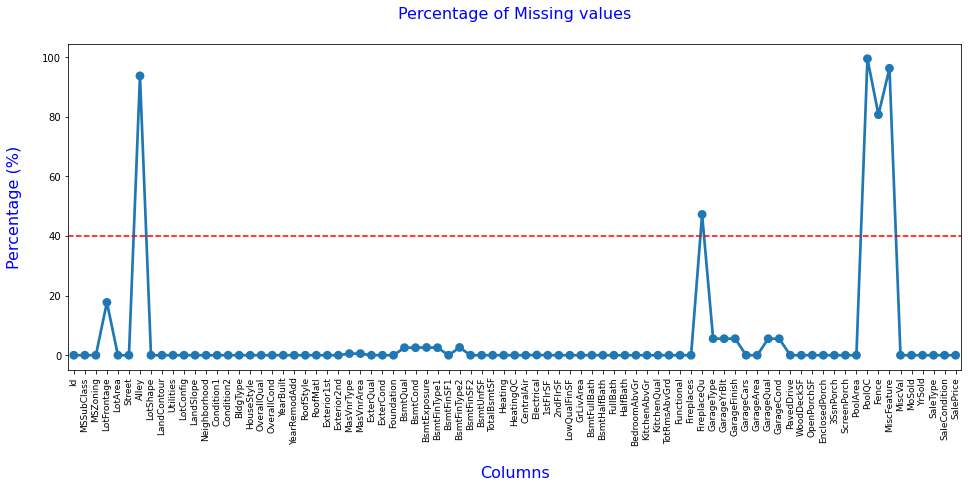

In [11]:
# Plotting 
# Setting the figure size for Point plot
plt.figure(figsize = (16,6))

# Point plot using seaborn
ax = sns.pointplot(housing.columns
                   , round((housing.isnull().sum()/len(housing.index))*100,3))

# Setting horizontal line at 45% 
ax.axhline(40, ls = '--', color = 'red')

# Setting X- axis and Y- axix display size
plt.xticks(rotation =90,fontsize =9)

# Setting title for the plot
plt.title("Percentage of Missing values", fontsize = 16, color = 'blue', pad = 25)

# Setting axis labels
plt.ylabel("Percentage (%)",fontsize = 16, color = 'blue', labelpad = 20)
plt.xlabel("Columns",fontsize = 16, color = 'blue', labelpad = 20)

# Displaying the plot using matplotlib.pyplot show() function
plt.show()

In [12]:
# rows with more than 50% null values
row_wise_null_count = len(housing[round(100*(housing.isnull().sum(axis = 1)/housing.shape[1]),2)>50.00])

print( 'Number of rows with more than 50% null values : ', row_wise_null_count)

Number of rows with more than 50% null values :  0


In [13]:
# Duplicate analysis Unique identifiers
dup_on_unique_col = housing.duplicated(subset='Id').sum()

print('Number of duplicate entries on Id column: ',dup_on_unique_col)

Number of duplicate entries on Id column:  0


In [14]:
# Cleaning the data 
# Dropping columns with above 40% meeting values
cols_with_40null = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']
housing.drop(cols_with_40null, axis=1, inplace=True)

In [15]:
# Deleted 5 columns with high null values
# Shape of the dataframe after deleting columns
housing.shape

(1460, 76)

In [17]:
# Checking null percentage after dropping the high null \
round((housing.isnull().sum()/len(housing.index))*100,3).sort_values(ascending=False)

LotFrontage      17.740
GarageFinish      5.548
GarageType        5.548
GarageCond        5.548
GarageQual        5.548
GarageYrBlt       5.548
BsmtExposure      2.603
BsmtFinType2      2.603
BsmtFinType1      2.534
BsmtCond          2.534
BsmtQual          2.534
MasVnrType        0.548
MasVnrArea        0.548
Electrical        0.068
RoofStyle         0.000
RoofMatl          0.000
SalePrice         0.000
Exterior1st       0.000
Exterior2nd       0.000
YearBuilt         0.000
ExterQual         0.000
ExterCond         0.000
Foundation        0.000
YearRemodAdd      0.000
BldgType          0.000
OverallCond       0.000
OverallQual       0.000
HouseStyle        0.000
Condition2        0.000
Condition1        0.000
Neighborhood      0.000
LandSlope         0.000
LotConfig         0.000
Utilities         0.000
LandContour       0.000
LotShape          0.000
Street            0.000
LotArea           0.000
MSZoning          0.000
MSSubClass        0.000
BsmtFinSF1        0.000
TotalBsmtSF     

In [18]:
# from above we see that there are 14 columns with <= 40% missing values, imputing below
# Segregating Categorical & Numerical Values

# Creating a list of categorical columns
categorical_col = housing.select_dtypes(exclude =["number"]).columns.values

# Creating a list of numerical columns
numerical_col = housing.select_dtypes(include =["number"]).columns.values

# Printing the list of columns of each datatype
print("Categorical Features : \n {} \n\n".format(categorical_col))
print("Numerical Features : \n {} ".format(numerical_col))

Categorical Features : 
 ['MSZoning' 'Street' 'LotShape' 'LandContour' 'Utilities' 'LotConfig'
 'LandSlope' 'Neighborhood' 'Condition1' 'Condition2' 'BldgType'
 'HouseStyle' 'RoofStyle' 'RoofMatl' 'Exterior1st' 'Exterior2nd'
 'MasVnrType' 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Heating' 'HeatingQC'
 'CentralAir' 'Electrical' 'KitchenQual' 'Functional' 'GarageType'
 'GarageFinish' 'GarageQual' 'GarageCond' 'PavedDrive' 'SaleType'
 'SaleCondition'] 


Numerical Features : 
 ['Id' 'MSSubClass' 'LotFrontage' 'LotArea' 'OverallQual' 'OverallCond'
 'YearBuilt' 'YearRemodAdd' 'MasVnrArea' 'BsmtFinSF1' 'BsmtFinSF2'
 'BsmtUnfSF' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF' 'LowQualFinSF'
 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath' 'HalfBath'
 'BedroomAbvGr' 'KitchenAbvGr' 'TotRmsAbvGrd' 'Fireplaces' 'GarageYrBlt'
 'GarageCars' 'GarageArea' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'MiscVal'

In [20]:
# Treating the missing values below
# Identifying numerical columns with null values

numerical_null_cols = round(((housing[numerical_col].isnull().sum()/
                              len(housing.index))*100),3).sort_values(ascending = False)

# Displaying numerical columns with null percentage (%)
numerical_null_cols[numerical_null_cols>0]


LotFrontage    17.740
GarageYrBlt     5.548
MasVnrArea      0.548
dtype: float64

In [22]:
# Treating null value in the numerical columns
# Custom function for box plot and dist plot of numerical columns

# Function Input: DataFrame, Column name
# Function Output: Returns None

def box_dist_plot_func(df, col):
    
    # Setting figure size
    plt.figure(figsize = (12,6))
    
    # Setting subplot coordinate
    plt.subplot(1,2,1)
    
    # Setting axis label and display parameters
    plt.xlabel(col,fontsize = 16, color = 'blue', labelpad = 20)
    
    # Plotting distribution plot using seaborn library
    sns.distplot(df[col])
    
    # Setting subplot coordinate
    plt.subplot(1,2,2)
    
    # Plotting box plot using seaborn library
    sns.boxplot(df[col])
    
    # Setting axis label and display parameters
    plt.xlabel(col,fontsize = 16, color = 'blue', labelpad = 20)
    
    # Showing the plot using matplotlib.pyplot show() function 
    plt.show()


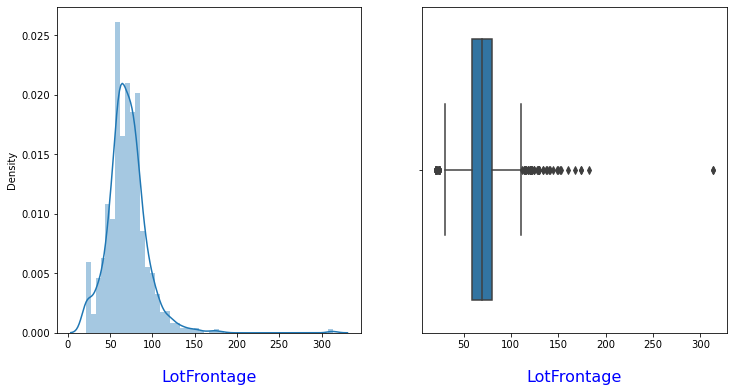

In [23]:
# Plotting 
box_dist_plot_func(housing, 'LotFrontage')

In [ ]:
# We can infer the following points from the above plots
# 1 There are outliers 
# 2 The data is right skewed
# 3 Missing values are imputied through median

In [24]:
# Imputing missing values for LotFrontage
housing['LotFrontage']= housing.LotFrontage.fillna(housing.LotFrontage.median())


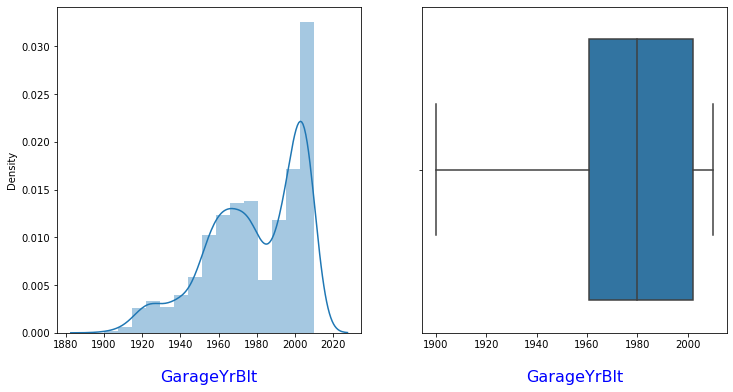

In [25]:
#Distribution and box plot of numeric column GarageYrBlt
box_dist_plot_func(housing, 'GarageYrBlt')

In [26]:
# Imputing missong values in GarageYrBlt
housing['GarageYrBlt']= housing.GarageYrBlt.fillna(housing.GarageYrBlt.mean()) 

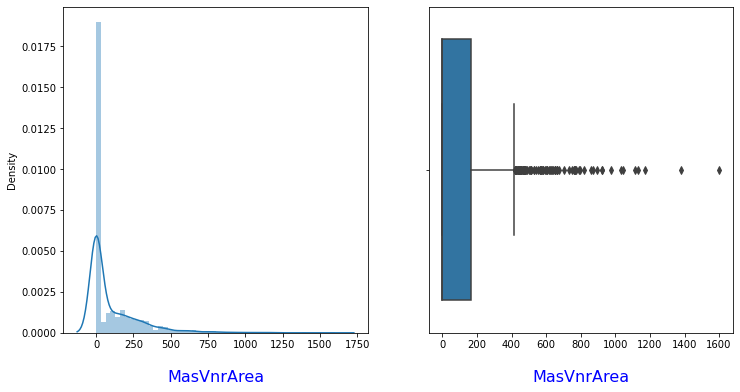

In [27]:
# distribution plot and box plot of numerical column 'MasVnrArea'

box_dist_plot_func(housing, 'MasVnrArea')

In [28]:
# We see outliers
# Imputing the missing values
housing['MasVnrArea']= housing.MasVnrArea.fillna(housing.MasVnrArea.median())

In [29]:
# Check values after imputation

numerical_null_cols = round(((housing[numerical_col].isnull().sum()/
                              len(housing.index))*100),3).sort_values(ascending = False)

# Displaying numerical columns with null percentage (%)
len(numerical_null_cols[numerical_null_cols>0])

0

In [ ]:
# we see that there are 0 null values present in the column post imputation

In [30]:
# Lets check null values for categorical columns
categorical_null_col = round(((housing[categorical_col].isnull().sum()/
                              len(housing.index))*100),3).sort_values(ascending = False)

# Displaying categorical columns with null percentage (%)
categorical_null_cols = categorical_null_col[categorical_null_col>0]

print(categorical_null_cols)

GarageCond      5.548
GarageQual      5.548
GarageFinish    5.548
GarageType      5.548
BsmtFinType2    2.603
BsmtExposure    2.603
BsmtCond        2.534
BsmtQual        2.534
BsmtFinType1    2.534
MasVnrType      0.548
Electrical      0.068
dtype: float64


In [32]:
# We see that there are 11 categorical columns exists in dataset and have missing columns. These can be imputed by values or be dropped
#Plotting count plot for categorical columns

def value_count_plot (df,column):
    
    # Setting the figure size for countplot
    plt.figure(figsize = (20,35))
    
    # Loop through each categorical columns having null values
    for col in enumerate(list(column)):
        
        # Setting subplot co-ordinates
        plt.subplot(4,3,col[0]+1)
        
        # Plotting count plot using seaborn
        sns.countplot(df[col[1]], palette = 'Set2')

        # Setting X- axis and Y- axix display size
        plt.xticks(fontsize = 8, rotation = 90)
        
        # Setting axis labels
        plt.ylabel("Count",fontsize = 16, color = 'blue', labelpad = 10)
        plt.xlabel(col[1].title(),fontsize = 16, color = 'blue', labelpad = 5)
    
# Displaying the plot using matplotlib.pyplot show() function
plt.show()

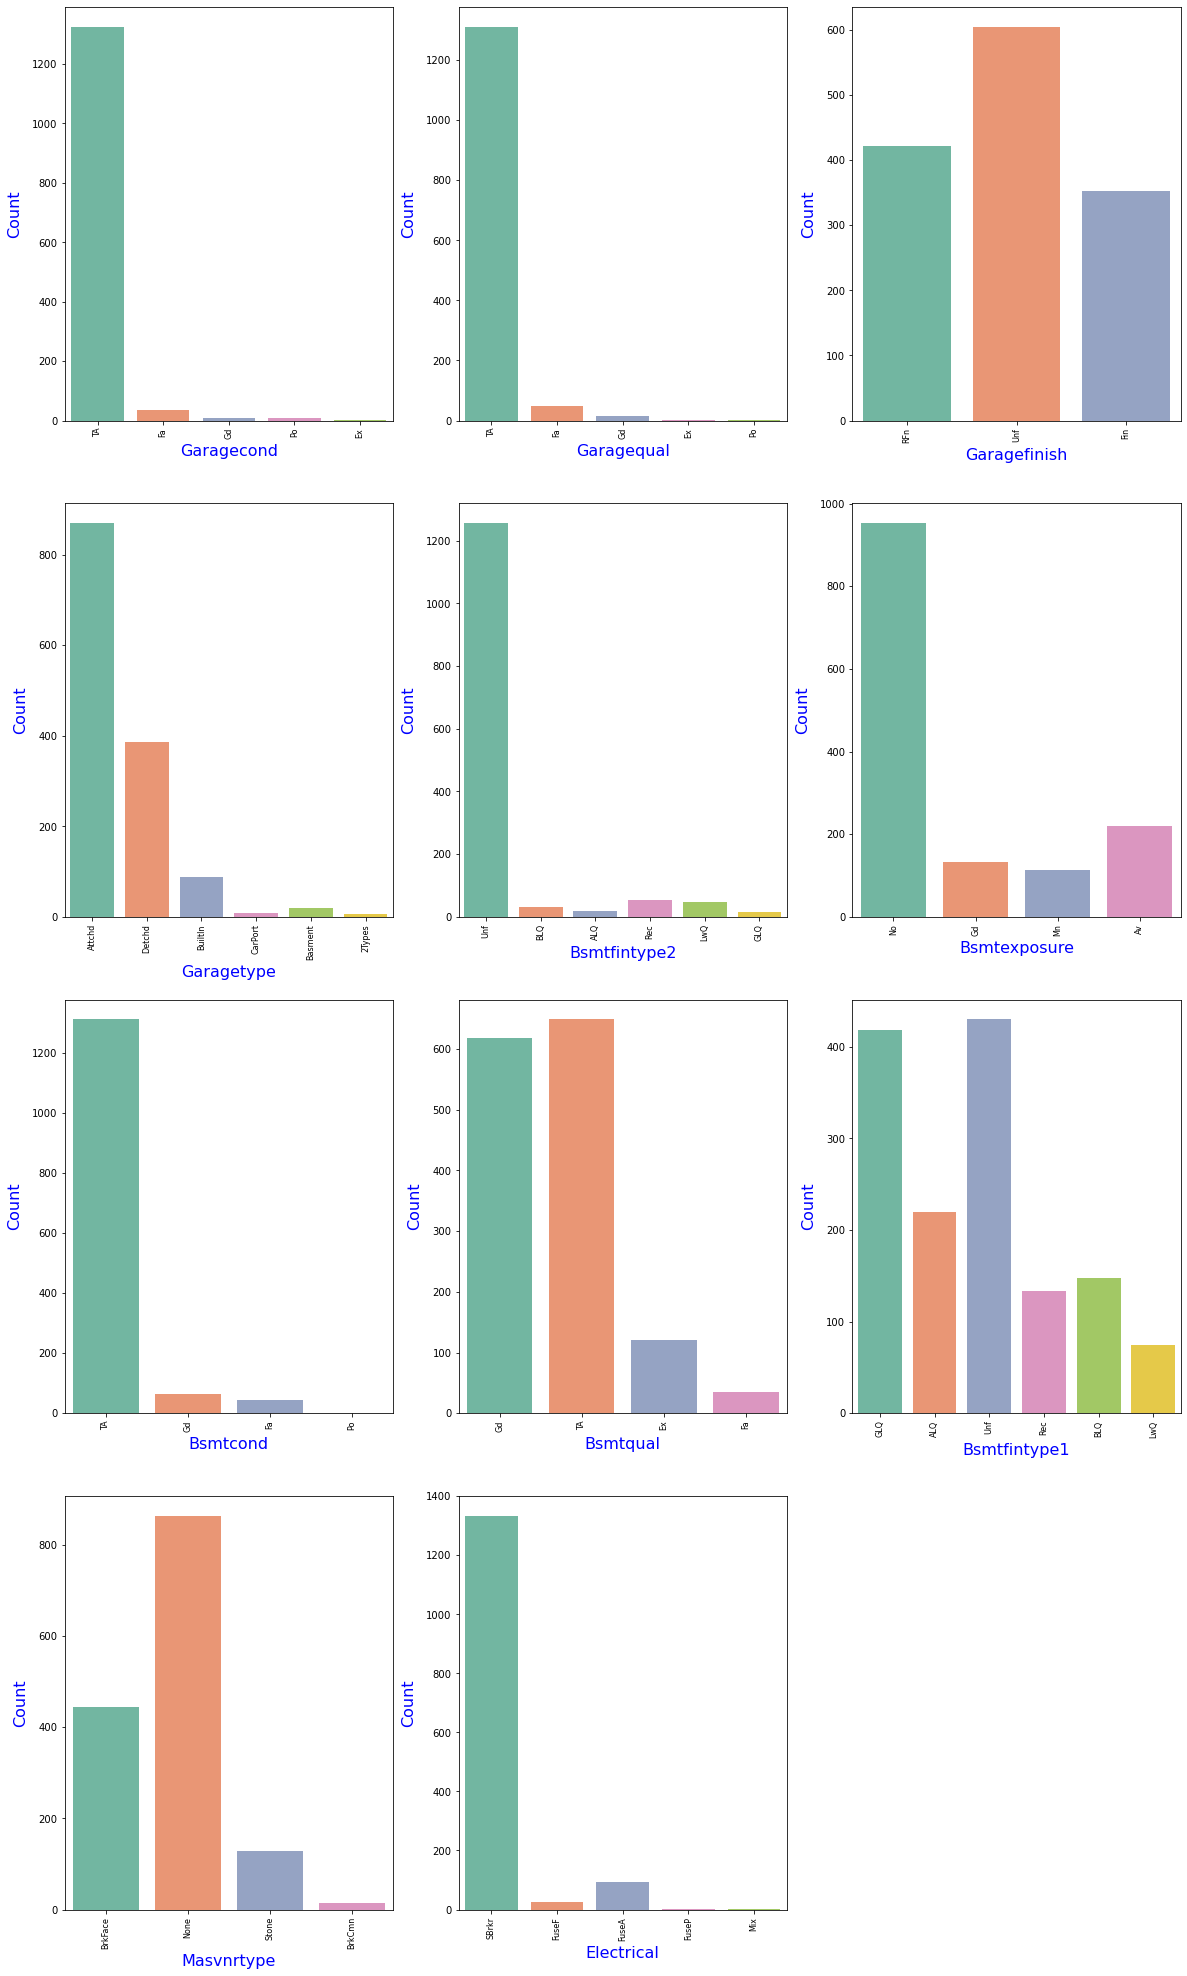

In [34]:
# Calling custom function for plotting categorical variables

value_count_plot(housing, categorical_null_cols.index)

From above plots, we find
- Mode values
-Column MasVnrType and Electrical are imputed with mode value
-Below columns are having meaningful missing values hence, imputing with new category.
      GarageType, GarageFinish, GarageCond, GarageQual columns are having NA values when the house does not have the garrage. Hence, replacing null with No Garrage
BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual columns are having NA when the house does not have the basement. Hence, replacing null with No Basement

In [37]:
# Replacing null with No Garrage, when the house doesn't have the garrage
housing['GarageType'] = housing['GarageType'].fillna('No Garage')
housing['GarageFinish'] = housing['GarageFinish'].fillna('No Garage')
housing['GarageCond'] = housing['GarageCond'].fillna('No Garage')
housing['GarageQual'] = housing['GarageQual'].fillna('No Garage')

# Replacing null with mode value 
housing['MasVnrType'] = housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0])
housing['Electrical'] = housing['Electrical'].fillna(housing['Electrical'].mode()[0])

# Replacing null with No Basement, when the house doesn't have the basement
housing['BsmtExposure'] = housing['BsmtExposure'].fillna('No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].fillna('No Basement')
housing['BsmtCond'] = housing['BsmtCond'].fillna('No Basement')
housing['BsmtQual'] = housing['BsmtQual'].fillna('No Basement')

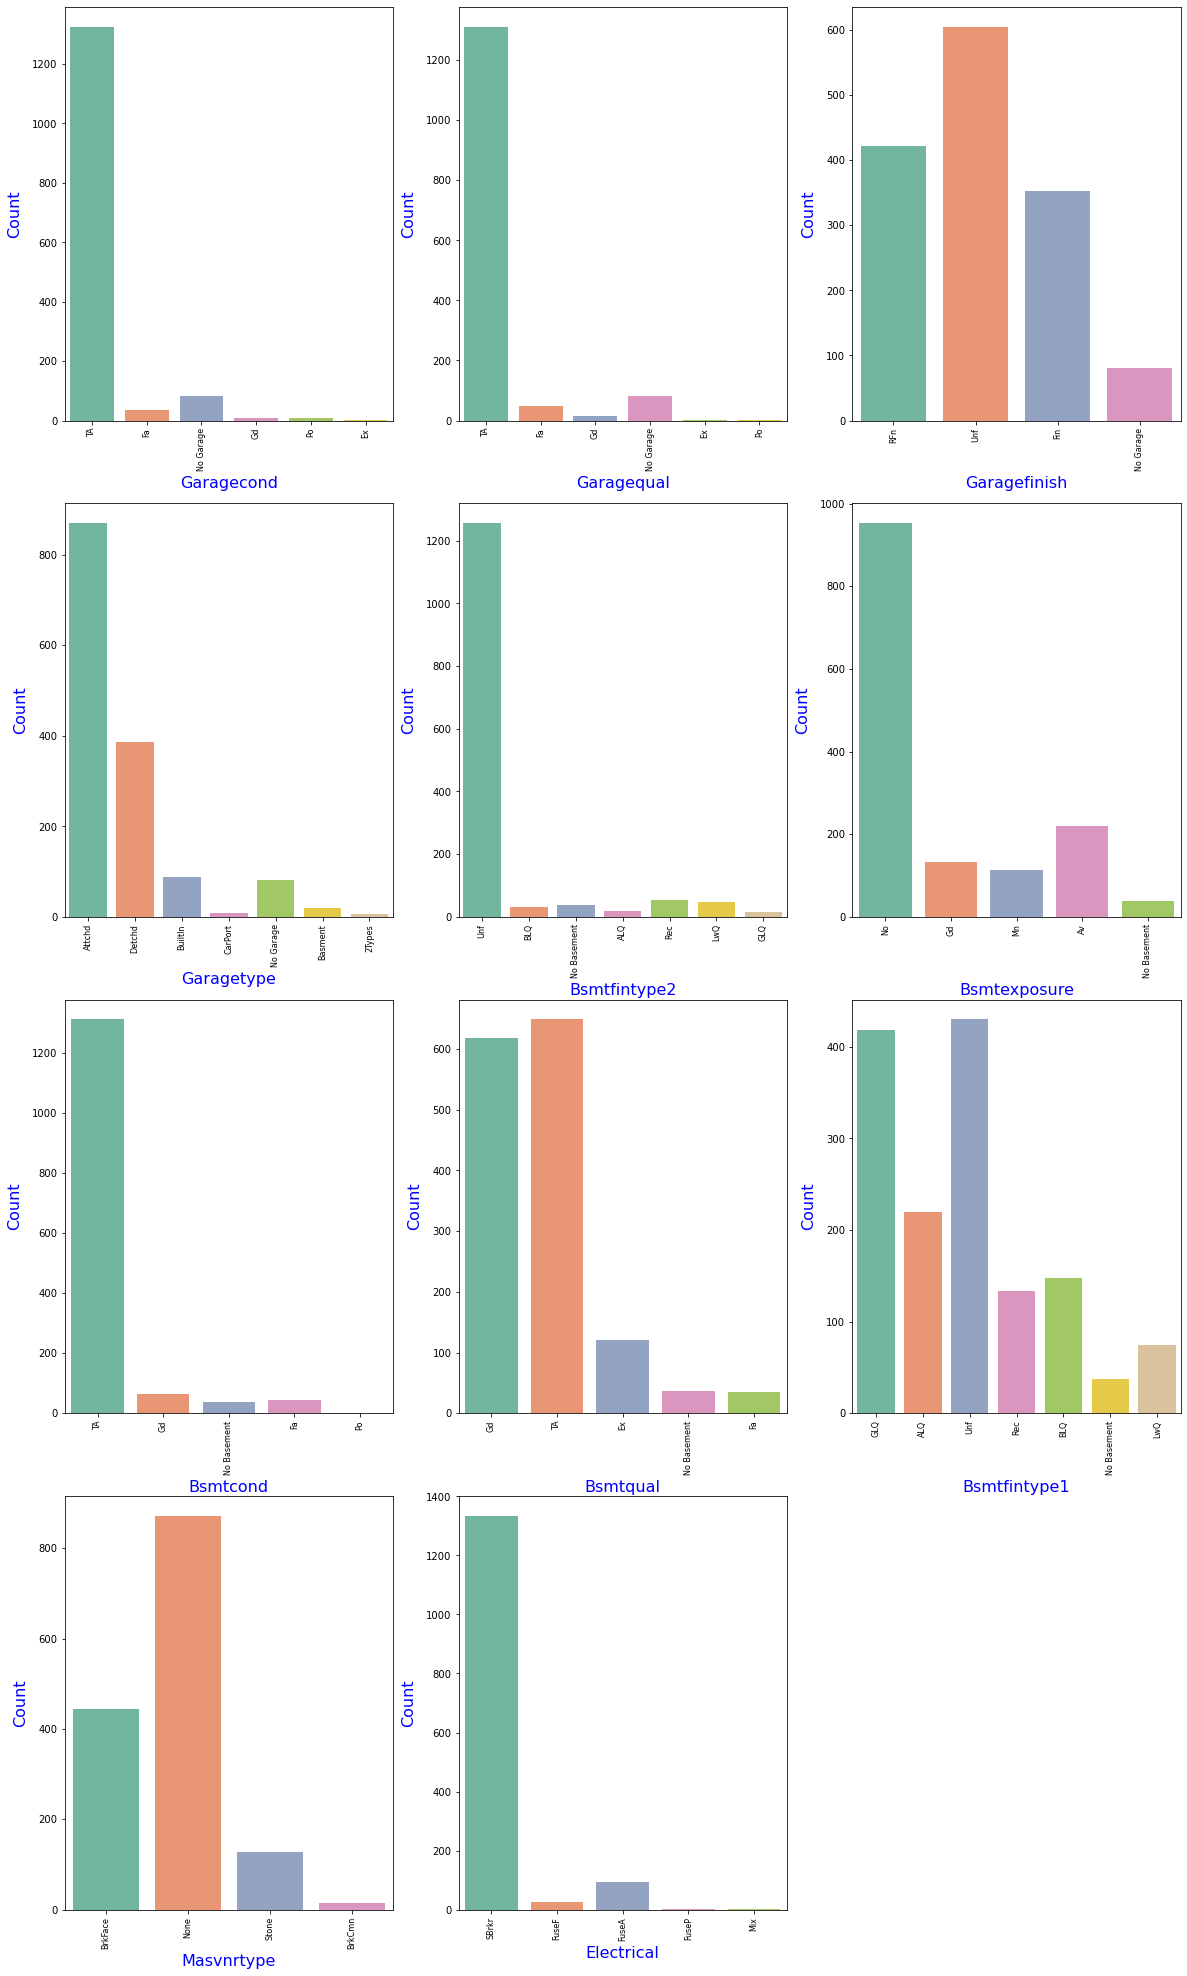

In [38]:
# custom function for plotting categorical variables

value_count_plot(housing, categorical_null_cols.index)

In [40]:
# Checking numerical columns for null values after imputation

categorical_null_col = round(((housing[categorical_col].isnull().sum()/
                              len(housing.index))*100),3).sort_values(ascending = False)

# Displaying numerical columns with null percentage (%)
categorical_null_cols = categorical_null_col[categorical_null_col>0]

# Printing number of categorical column exists with null entries
print(len(categorical_null_cols))

0


In [ ]:
# We find that after imputation there are 0 null value present

In [41]:
# Lets check Numerical Categorical Column
# Converting numerical column to categorical so that dummy variables can be created

housing['MSSubClass']=housing['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

housing['OverallQual']=housing['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

housing['OverallCond']=housing['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [42]:
# Displaying the dataset after numerical to categorical conversion of 'MSSubClass', 'OverallQual' & 'OverallCond'

housing.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,2-STORY 1946 & NEWER,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,2-STORY 1946 & NEWER,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,2-STORY 1945 & OLDER,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,2-STORY 1946 & NEWER,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [43]:
# Checking datatypes after converting few columns

housing.dtypes

Id                 int64
MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [44]:
# Lets perfom EDA on the dataset
#Univariate Analysis - Categorical Variables
def univariate_cate_func (df,column):
    
    # Setting the figure size for countplot
    plt.figure(figsize = (22,22))
    
    # Loop through each categorical columns having null values
    for col in enumerate(list(column)):
        
        # Setting subplot co-ordinates
        plt.subplot(2,3,col[0]+1)
        
        # Plotting count plot using seaborn
        sns.countplot(df[col[1]], palette = 'Set2')

        # Setting X- axis and Y- axix display size
        plt.xticks(fontsize = 10, rotation = 90)
        
        # Setting axis labels
        plt.ylabel("Count",fontsize = 16, color = 'blue', labelpad = 10)
        plt.xlabel(col[1].title(),fontsize = 16, color = 'blue', labelpad = 5)
    
# Displaying the plot using matplotlib.pyplot show() function
plt.show()

In [45]:
# Get list of categorical columns

Cat_cols = housing.select_dtypes(include=['object'])

# Dislaying list of categorical column names
Cat_cols.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

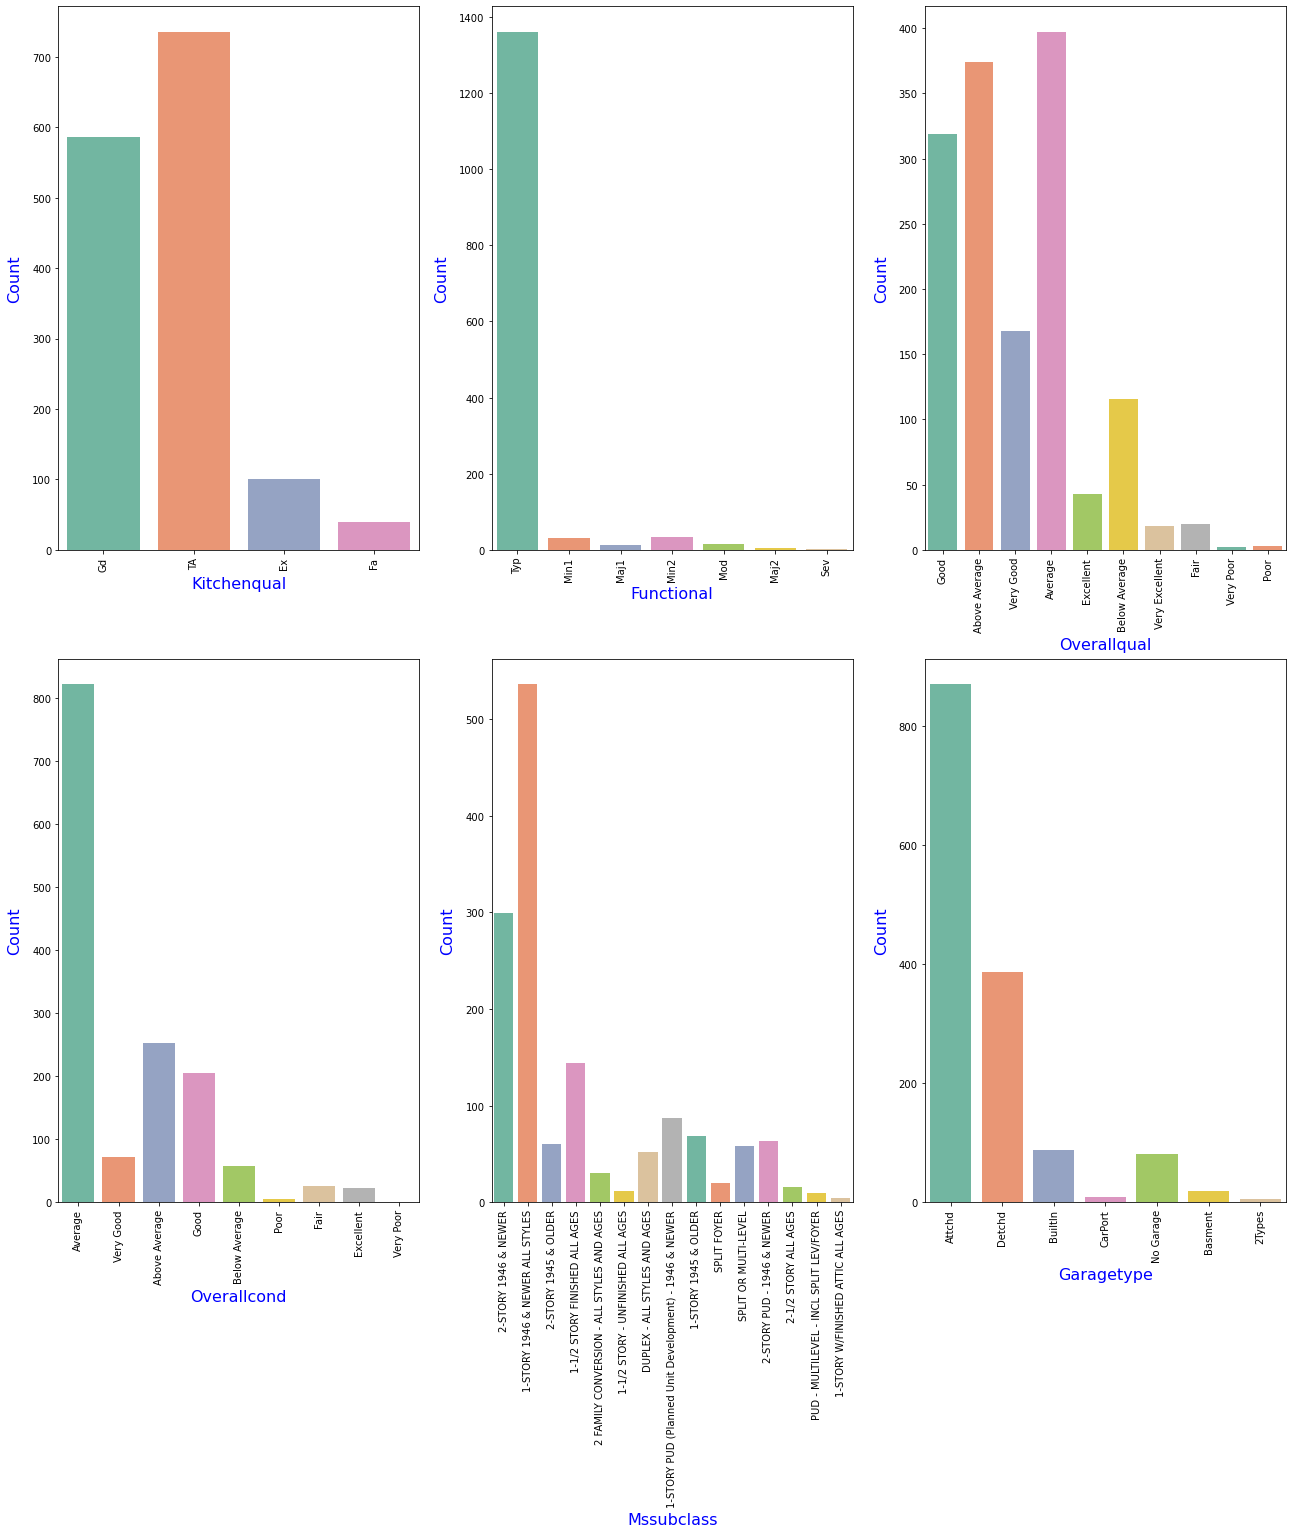

In [46]:
# Performing Univariate analysis

# Randomly making groups of six colums
col_names = ['KitchenQual', 'Functional', 'OverallQual', 'OverallCond', 'MSSubClass', 'GarageType']


# Calling custom function for univariate analysis
univariate_cate_func(housing,col_names)

In [47]:
# Dropping highly skewed categorical column 'Functional'

housing.drop(['Functional'], axis=1, inplace=True)

In [48]:
# Grouping 'Basment','CarPort','2Types' types as 'Others' in 'GarageType' column

housing['GarageType'] = housing['GarageType'].replace(['Basment','CarPort','2Types'],'Others')

In [49]:
# Checking entries in GarageType column after grouping few values

housing['GarageType'].value_counts(normalize = True)*100

Attchd       59.589041
Detchd       26.506849
BuiltIn       6.027397
No Garage     5.547945
Others        2.328767
Name: GarageType, dtype: float64

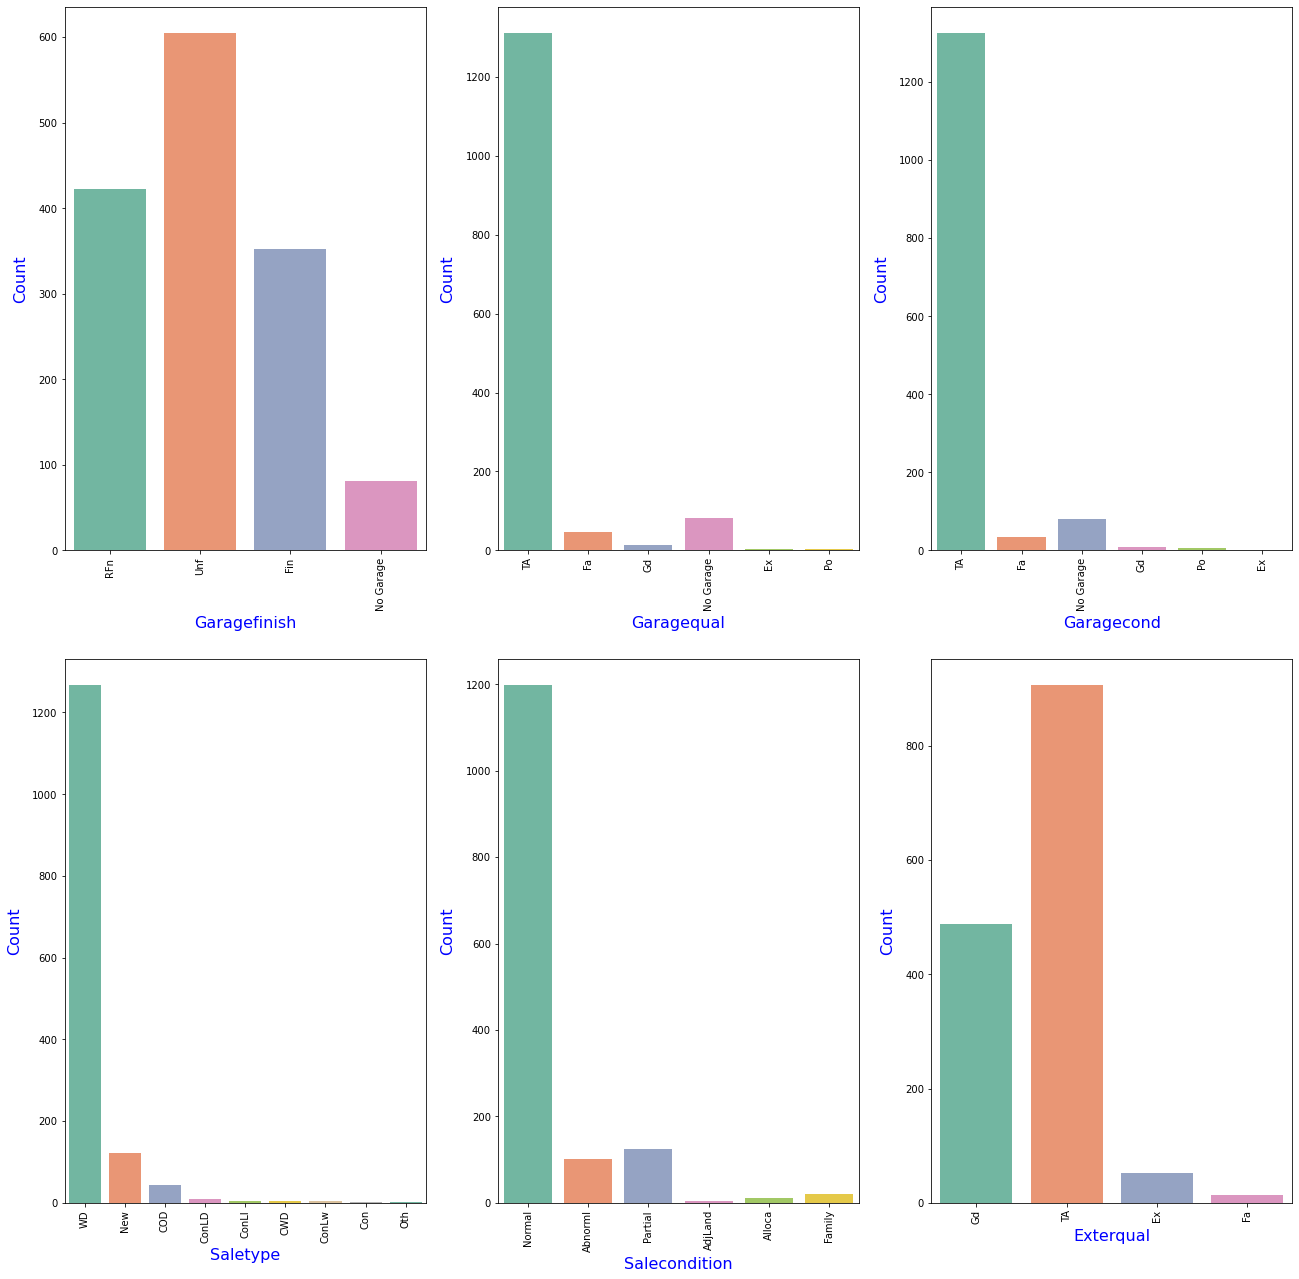

In [50]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['GarageFinish', 'GarageQual', 'GarageCond', 'SaleType', 'SaleCondition', 'ExterQual']


# Calling custom function for univariate analysis
univariate_cate_func(housing,col_names)

In [51]:
# Grouping 'Family','Alloca','AdjLand' as 'Others' in 'SaleCondition' column

housing['SaleCondition'] = housing['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')

In [52]:
# Checking SaleCondition column after grouping few values

housing['SaleCondition'].value_counts(normalize = True)*100

Normal     82.054795
Partial     8.561644
Abnorml     6.917808
Others      2.465753
Name: SaleCondition, dtype: float64

In [53]:
# Dropping highly skewed columns 'GarageQual','GarageCond' and 'SaleType'
housing.drop(['GarageQual','GarageCond','SaleType'], axis=1, inplace=True)

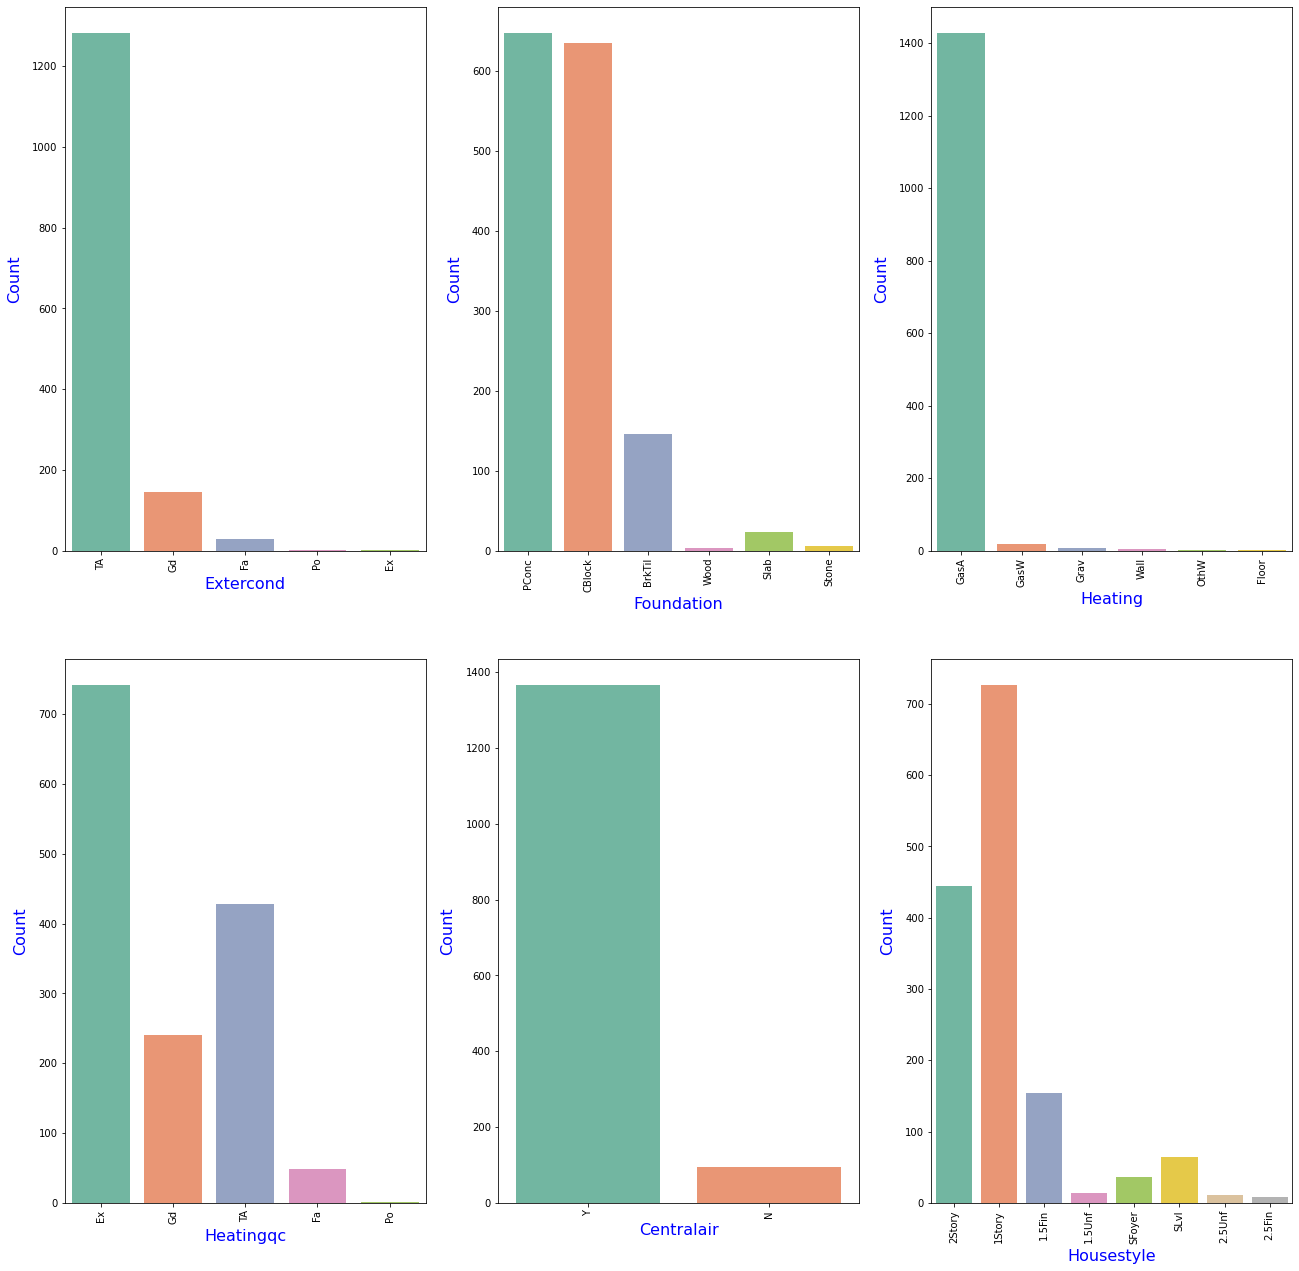

In [54]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'HouseStyle']


# Calling custom function for univariate analysis
univariate_cate_func(housing,col_names)

In [55]:
# Dropping highly skewed columns 'CentralAir','Heating' and 'ExterCond' 

housing.drop(['CentralAir','Heating','ExterCond'], axis=1, inplace=True)

In [56]:
# Grouping 'Slab','Stone','Wood' values to a new category 'Others'

housing['Foundation'] = housing['Foundation'].replace(['Slab','Stone','Wood'],'Others')

In [57]:
# Checking entries in SaleCondition column after grouping few values

housing['Foundation'].value_counts(normalize = True)*100

PConc     44.315068
CBlock    43.424658
BrkTil    10.000000
Others     2.260274
Name: Foundation, dtype: float64

In [59]:
# Grouping 'SFoyer','1.5Unf','2.5Unf','2.5Fin' values to a new category 'Others'

housing['HouseStyle'] = housing['HouseStyle'].replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')

In [60]:
# Checking entries in HouseStyle column after grouping few values

housing['HouseStyle'].value_counts(normalize = True)*100

1Story    49.726027
2Story    30.479452
1.5Fin    10.547945
Others     4.794521
SLvl       4.452055
Name: HouseStyle, dtype: float64

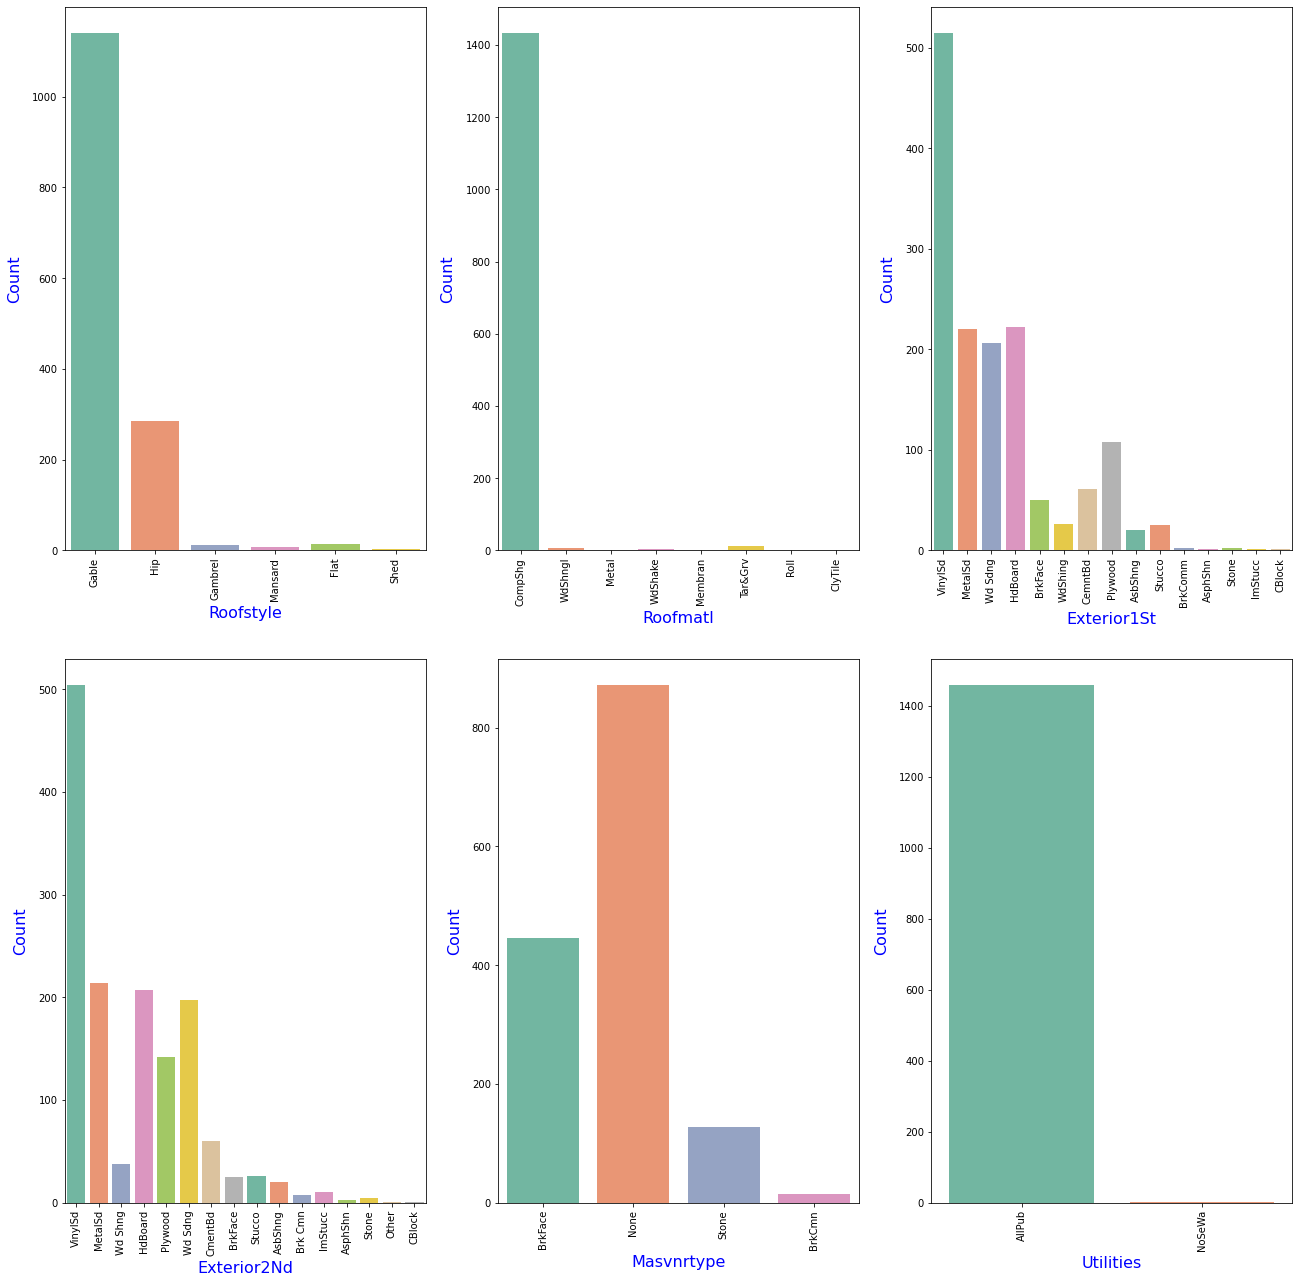

In [61]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Utilities']


# Calling custom function for univariate analysis
univariate_cate_func(housing,col_names)

In [62]:
# Dropping highly skewed columns 'RoofMatl','Utilities' 

housing.drop(['RoofMatl','Utilities'], axis=1, inplace=True)

In [72]:
# Grouping values with very low count into a new category 'Others' for following columns
# RoofStyle, Exterior1st and Exterior2nd

housing['RoofStyle'] = housing['RoofStyle'].replace(['Shed','Mansard','Gambrel','Flat'],'Others')
housing['Exterior1st'] = housing['Exterior1st'].replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
housing['Exterior2nd'] = housing['Exterior2nd'].replace(['Other','AsphShn','ImStucc','CBlock','Stone','Brk Cmn','AsbShng','Stucco','BrkFace'],'Others')

In [73]:
# Checking entries in RoofStyle column after grouping few values

housing['RoofStyle'].value_counts(normalize = True)*100

Gable     78.150685
Hip       19.589041
Others     2.260274
Name: RoofStyle, dtype: float64

In [74]:
# Checking entries in Exterior1st column after grouping few values

housing['Exterior1st'].value_counts(normalize = True)*100

VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
Others      5.342466
CemntBd     4.178082
BrkFace     3.424658
Name: Exterior1st, dtype: float64

In [76]:
# Checking entries in Exterior2nd column after grouping few values

housing['Exterior2nd'].value_counts(normalize = True)*100

VinylSd    37.191781
MetalSd    15.410959
HdBoard    15.205479
Wd Sdng    14.520548
Plywood    10.273973
CmentBd     4.726027
Wd Shng     2.671233
Name: Exterior2nd, dtype: float64

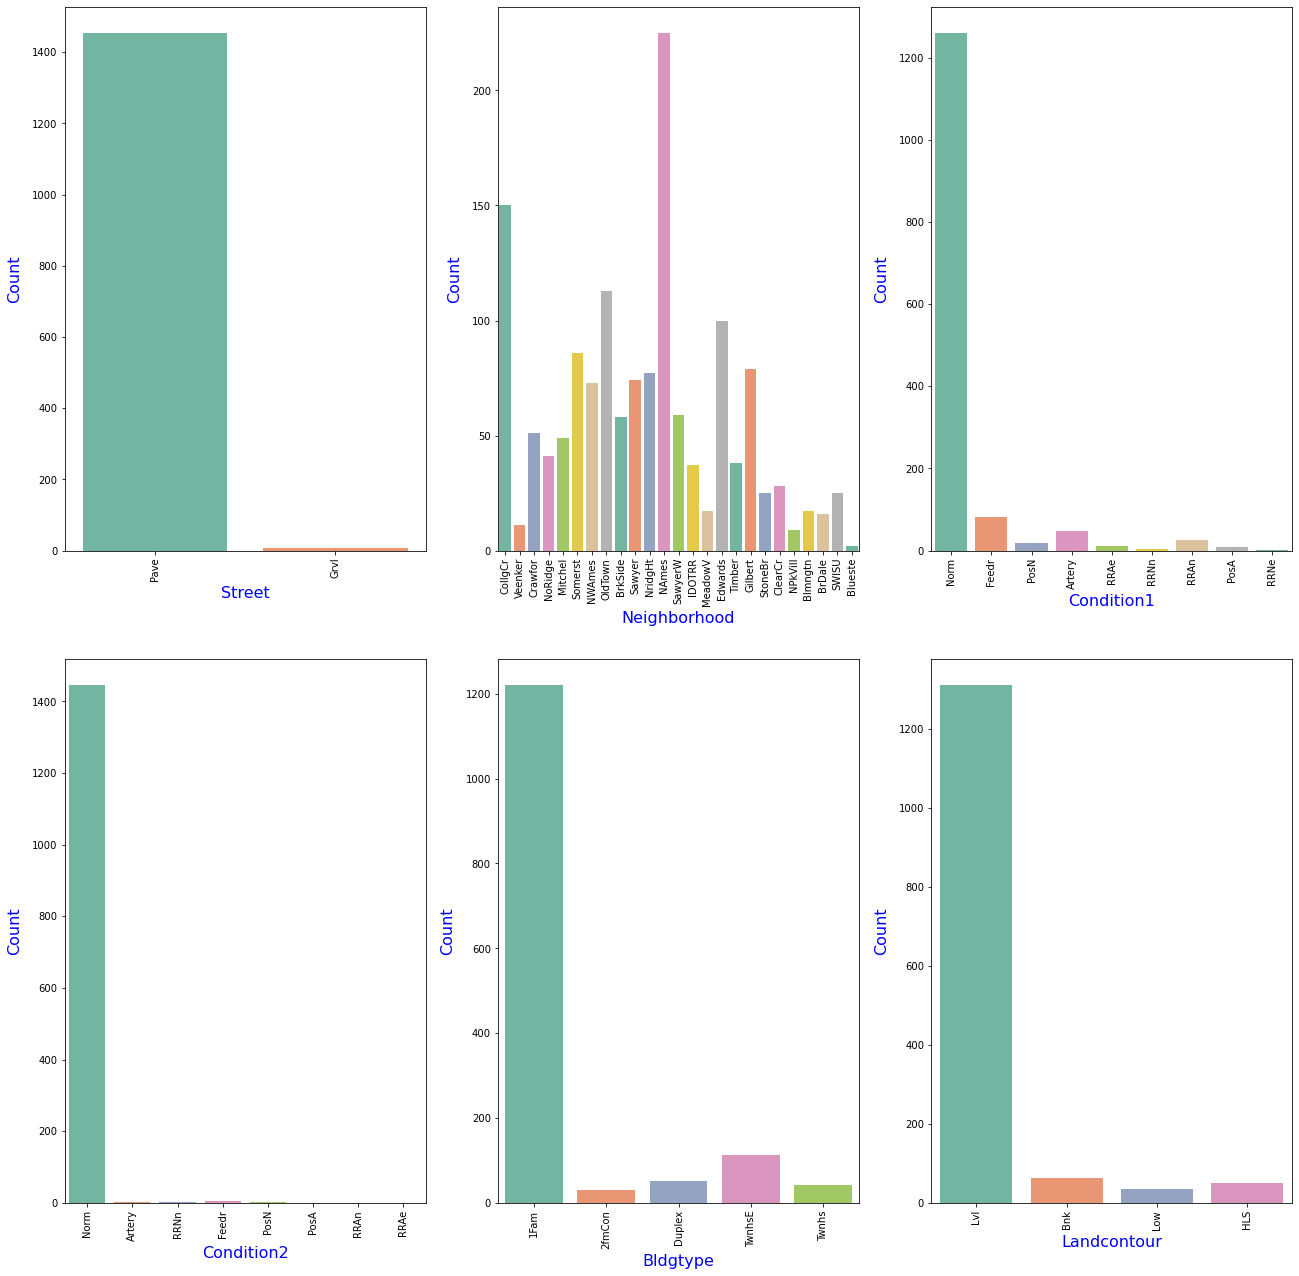

In [77]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['Street', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'LandContour']


# Calling custom function for univariate analysis
univariate_cate_func(housing,col_names)

In [78]:
# Dropping highly skewed columns 'LandContour','Street','Condition1' & 'Condition2'

housing.drop(['LandContour','Street','Condition1','Condition2'],axis=1,inplace=True)

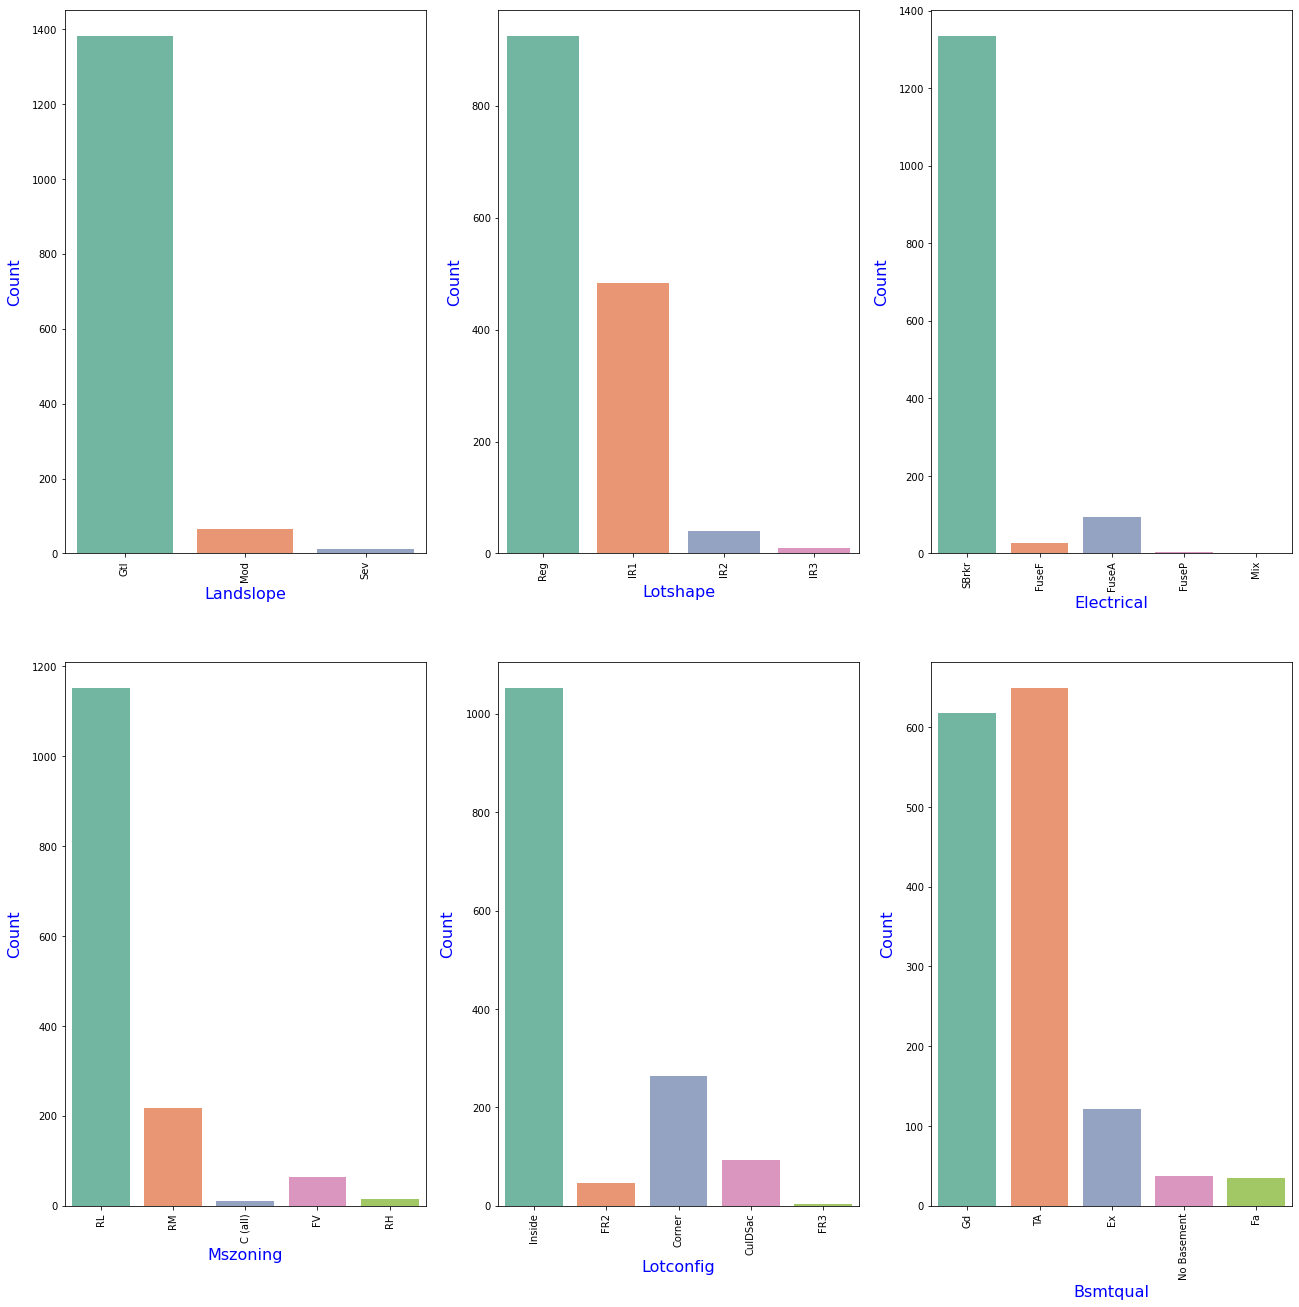

In [79]:
# Performing Univariate analysis

# Randomly making groups of another six colums
col_names = ['LandSlope', 'LotShape', 'Electrical', 'MSZoning', 'LotConfig', 'BsmtQual']


# Calling custom function for univariate analysis
univariate_cate_func(housing,col_names)

In [80]:
# Dropping highly skewed columns 'LandSlope' & 'Electrical'

housing.drop(['LandSlope','Electrical'], axis=1, inplace=True)

In [81]:
# Grouping values with very low count into a new category 'Others' 

housing['MSZoning'] = housing['MSZoning'].replace(['RH','C (all)'],'Others')

In [82]:
# Checking entries in MSZoning column after grouping few values

housing['MSZoning'].value_counts(normalize = True)*100

RL        78.835616
RM        14.931507
FV         4.452055
Others     1.780822
Name: MSZoning, dtype: float64

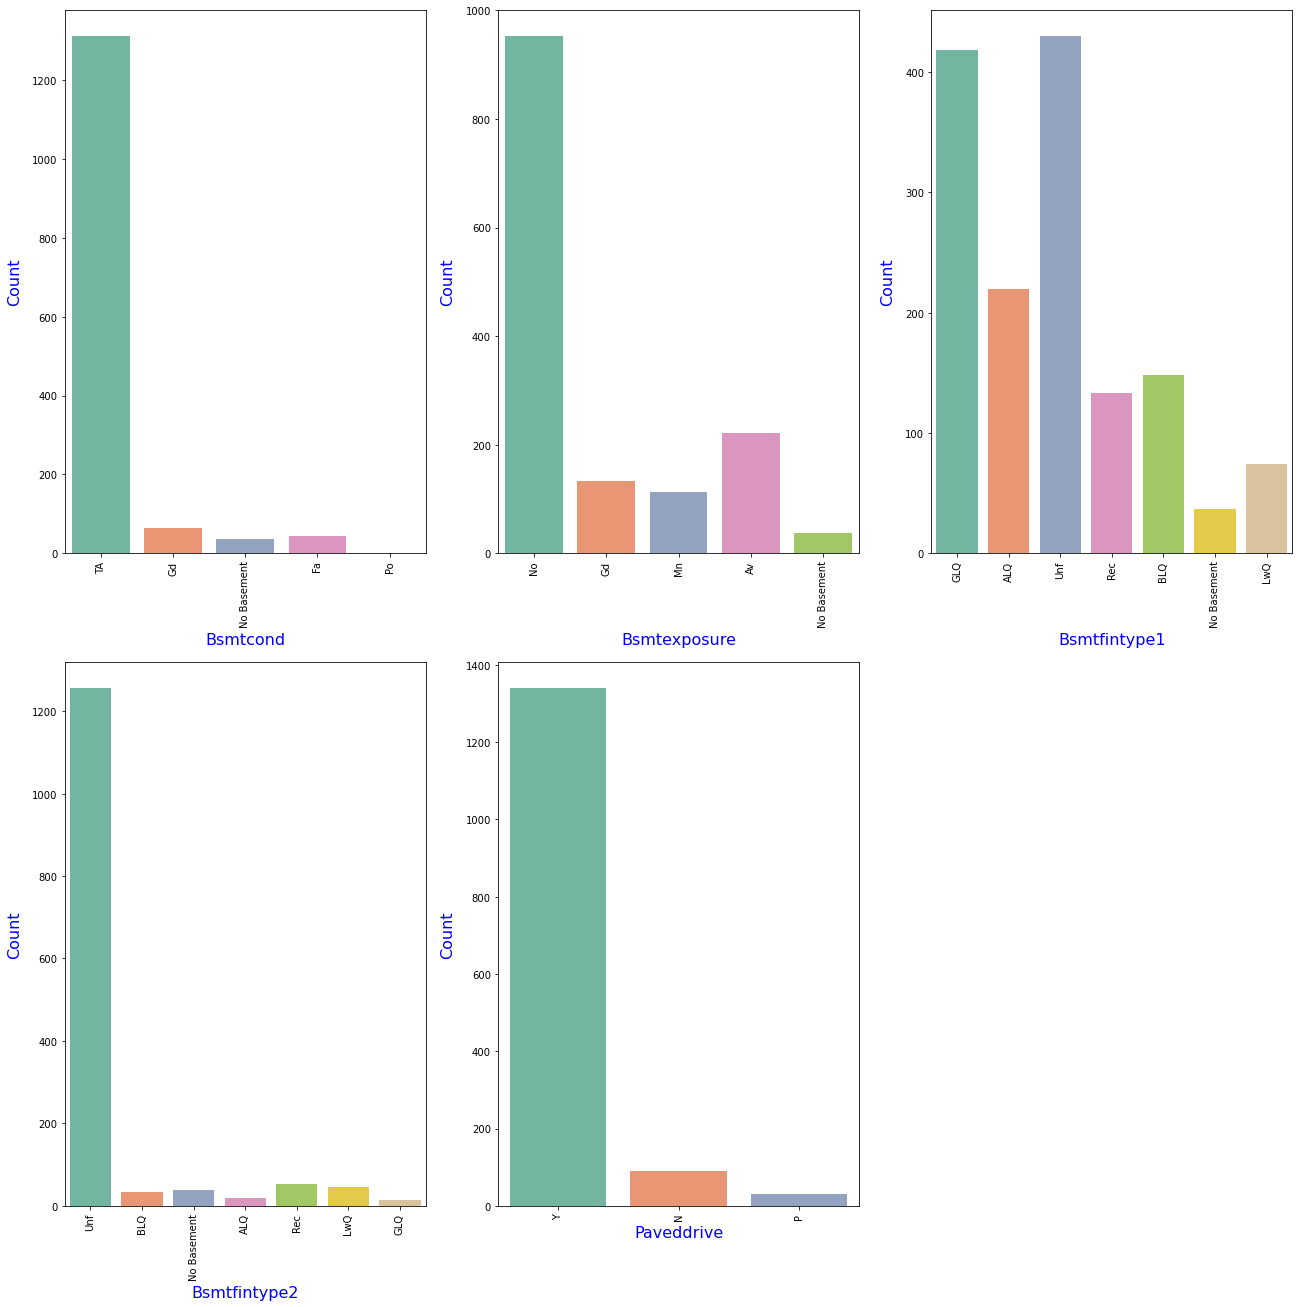

In [83]:
# Performing Univariate analysis

# Randomly making groups of rest all colums
col_names = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'PavedDrive']


# Calling custom function for univariate analysis
univariate_cate_func(housing,col_names)

In [84]:
# Dropping highly skewed columns 'BsmtFinType2','PavedDrive' & 'BsmtCond'

housing.drop(['BsmtFinType2','PavedDrive','BsmtCond'],axis=1,inplace=True)

In [85]:
housing.shape

(1460, 58)

In [86]:
# Derived Variable Creation
# Extract age of building using 'YearBuilt' column 

# Extract current year from today's date
curr_year = date.today().year

# Adding Age column in DataFrame to display age of the building
housing['AgeOftheHouse'] = curr_year - housing['YearBuilt']

In [87]:
# Dropping original 'YearBuilt' column along with the other year & month columns 'YearRemodAdd',
# 'GarageYrBlt','YrSold', 'MoSold' as there is no use of these columns for prediction

housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'], axis=1, inplace=True)


In [88]:
# Dropping 'Id' column as that is not required for prediction

housing.drop(['Id'], axis = 1, inplace = True)

In [89]:
housing.shape

(1460, 53)

In [90]:
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,AgeOftheHouse
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,Normal,208500,19
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,Normal,181500,46
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,0,2,1,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,Normal,223500,21
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,Good,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,0,1,0,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,272,0,0,0,0,Abnorml,140000,107
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,Very Good,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,Normal,250000,22


In [91]:
# Bivariate Analysis
# Cat vs Numerical
def Bivariate_BoxAnalysis_func (df,column):
    
    # Setting the figure size for countplot
    plt.figure(figsize = (15,15))
    
    # Loop through each categorical columns having null values
    for col in enumerate(list(column)):
        
        # Setting subplot co-ordinates
        plt.subplot(2,2,col[0]+1)
        
        # Plotting box plot using seaborn
        sns.boxplot(df[col[1]], df['SalePrice'], palette = 'Set2')

        # Setting X- axis and Y- axix display size
        plt.xticks(fontsize = 10, rotation = 90)
        
        # Setting axis labels
        plt.ylabel("SalePrice",fontsize = 16, color = 'blue', labelpad = 10)
        plt.xlabel(col[1],fontsize = 16, color = 'blue', labelpad = 5)
    
# Displaying the plot using matplotlib.pyplot show() function
plt.show()

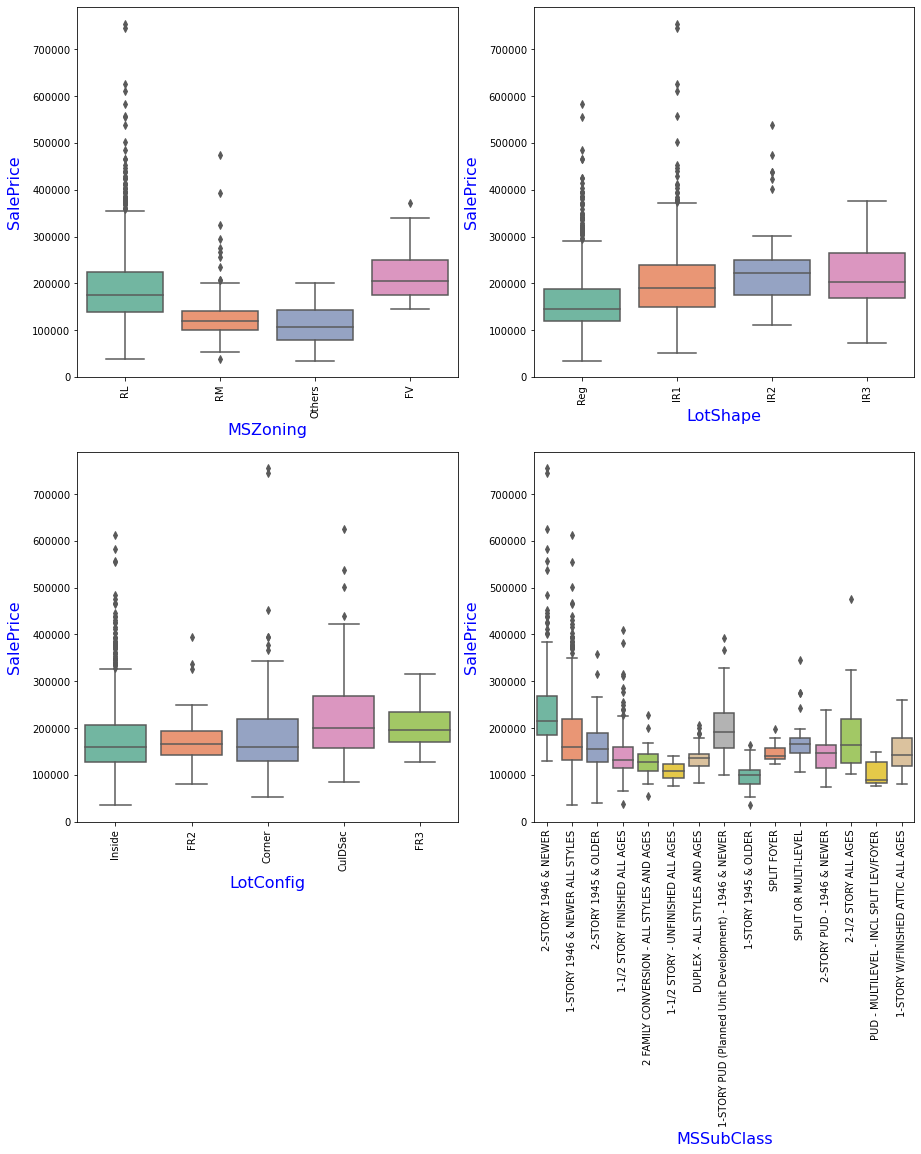

In [92]:
# Performing Bivariate analysis

# Randomly making groups of four colums
col_names = ['MSZoning', 'LotShape', 'LotConfig', 'MSSubClass']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(housing ,col_names)

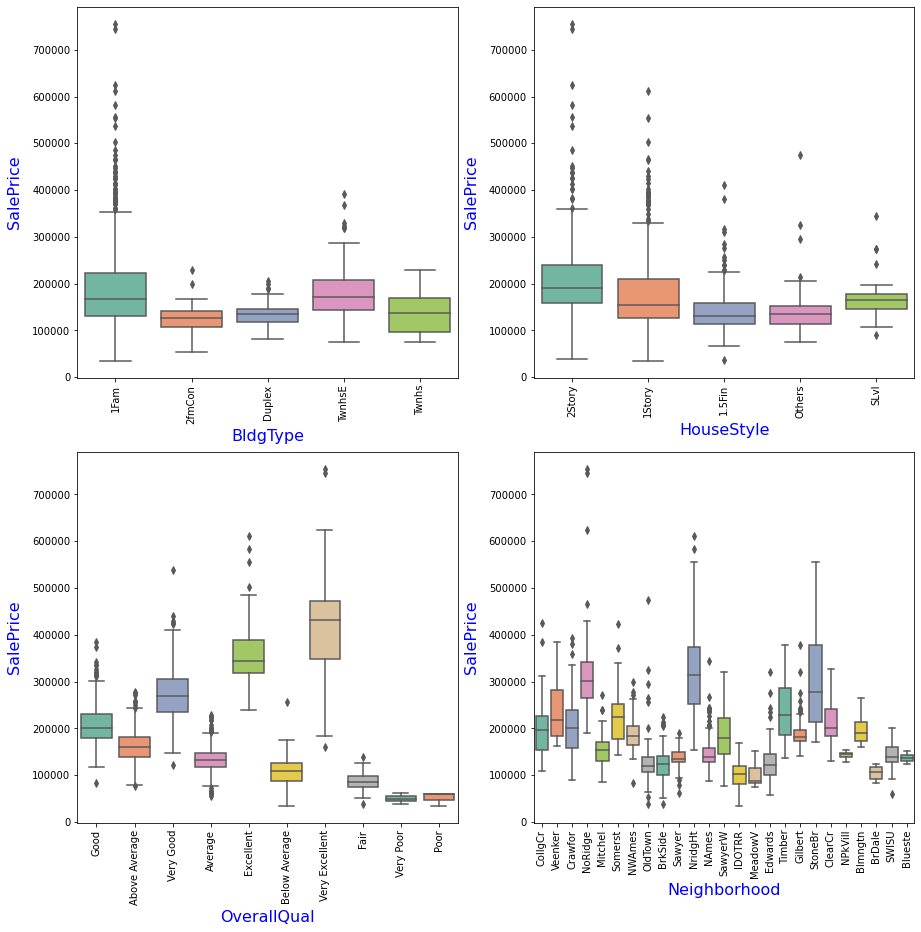

In [93]:
# Performing Bivariate analysis

# Randomly making groups of another four colums
col_names = ['BldgType', 'HouseStyle', 'OverallQual', 'Neighborhood']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(housing ,col_names)

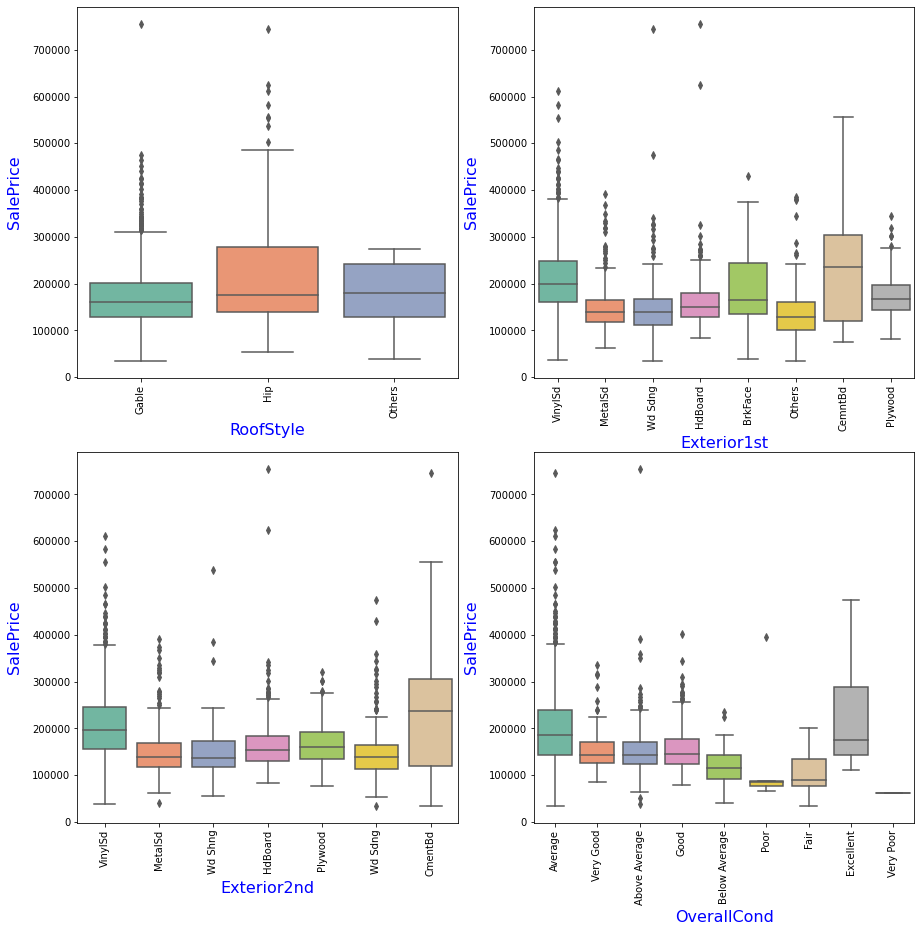

In [94]:
# Performing Bivariate analysis

# Randomly making groups of another four colums
col_names = ['RoofStyle', 'Exterior1st', 'Exterior2nd', 'OverallCond']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(housing,col_names)

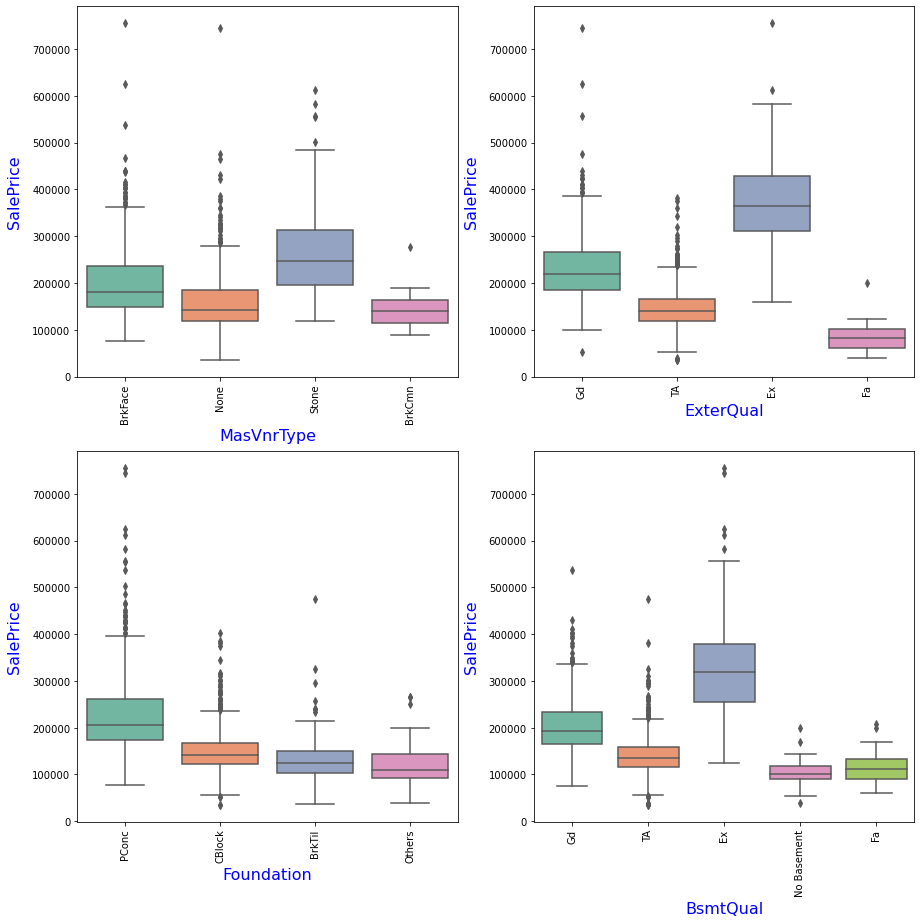

In [95]:
# Performing Bivariate analysis

# Randomly making groups of another four colums
col_names = ['MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(housing,col_names)

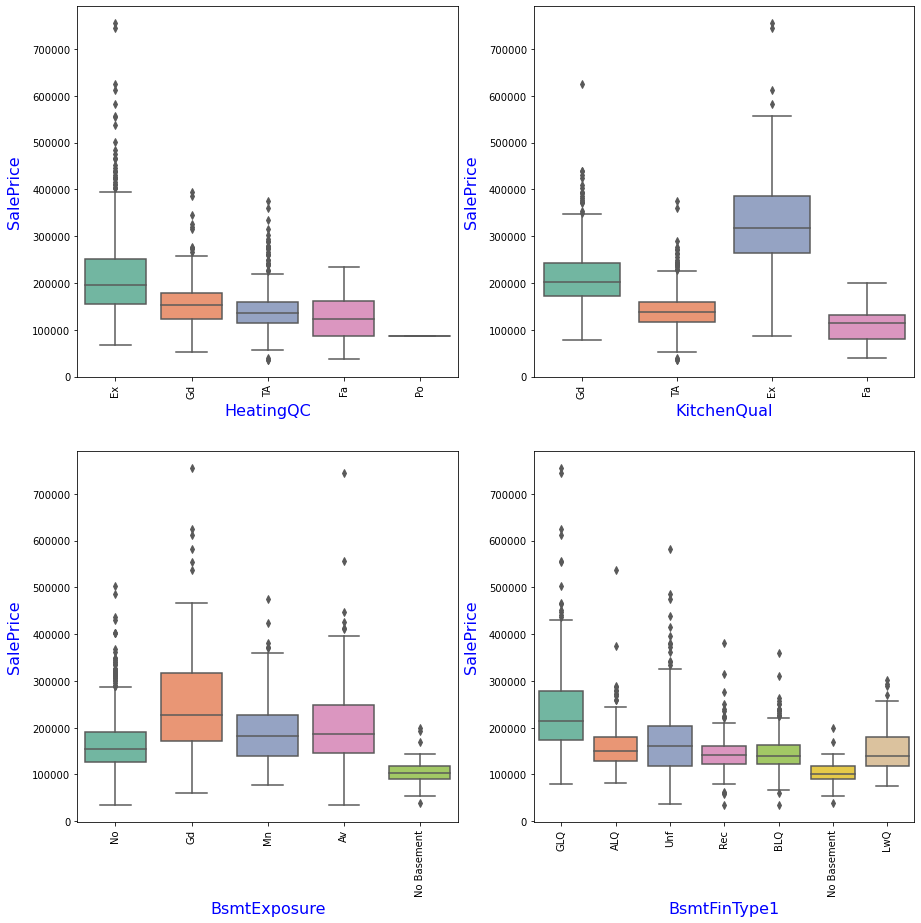

In [96]:
# Performing Bivariate analysis

# Randomly making groups of another four colums
col_names = ['HeatingQC', 'KitchenQual', 'BsmtExposure', 'BsmtFinType1']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(housing,col_names)

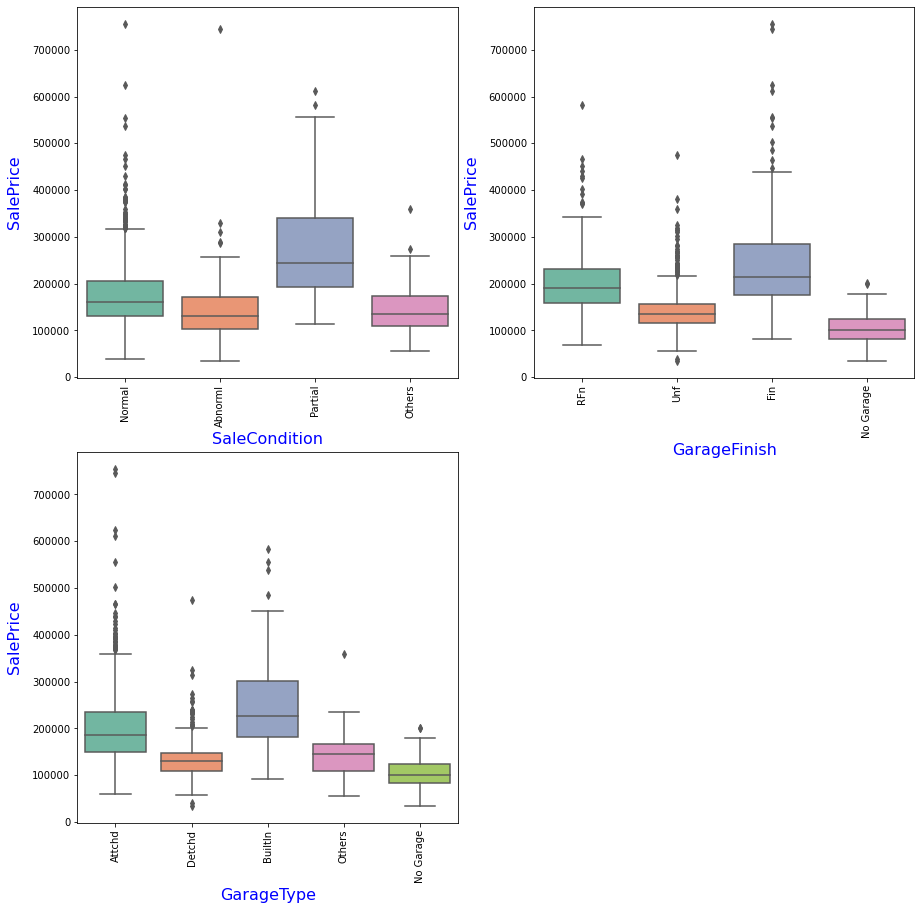

In [97]:
# Performing Bivariate analysis

# Randomly making groups of rest all colums
col_names = ['SaleCondition', 'GarageFinish', 'GarageType']


# Calling custom function for Bivariate analysis
Bivariate_BoxAnalysis_func(housing,col_names)

In [98]:
# Numerical vs Numerical plot

def Bivariate_ScatterAnalysis_func(df, number_cols):
    
  # Setting the figure size for scatterplot
  plt.figure(figsize = (18,16))
    
# ploting the scatter plot using subplot
  for col_num in enumerate(number_cols):
        
    plt.subplot(2,2,col_num[0]+1)
    
    sns.scatterplot(df[col_num[1]],df['SalePrice'])
    
  # Setting axis display zize
    plt.xticks(fontsize=10)
    plt.yticks(fontsize='10')
    
  # Setting axis labels
    plt.ylabel("SalePrice",fontsize = 15, color = 'blue', labelpad = 12)
    plt.xlabel(col_num[1].title(),fontsize = 15, color = 'blue', labelpad = 12)
    
# Displaying the plot using matplotlib.pyplot show() function
  plt.show()

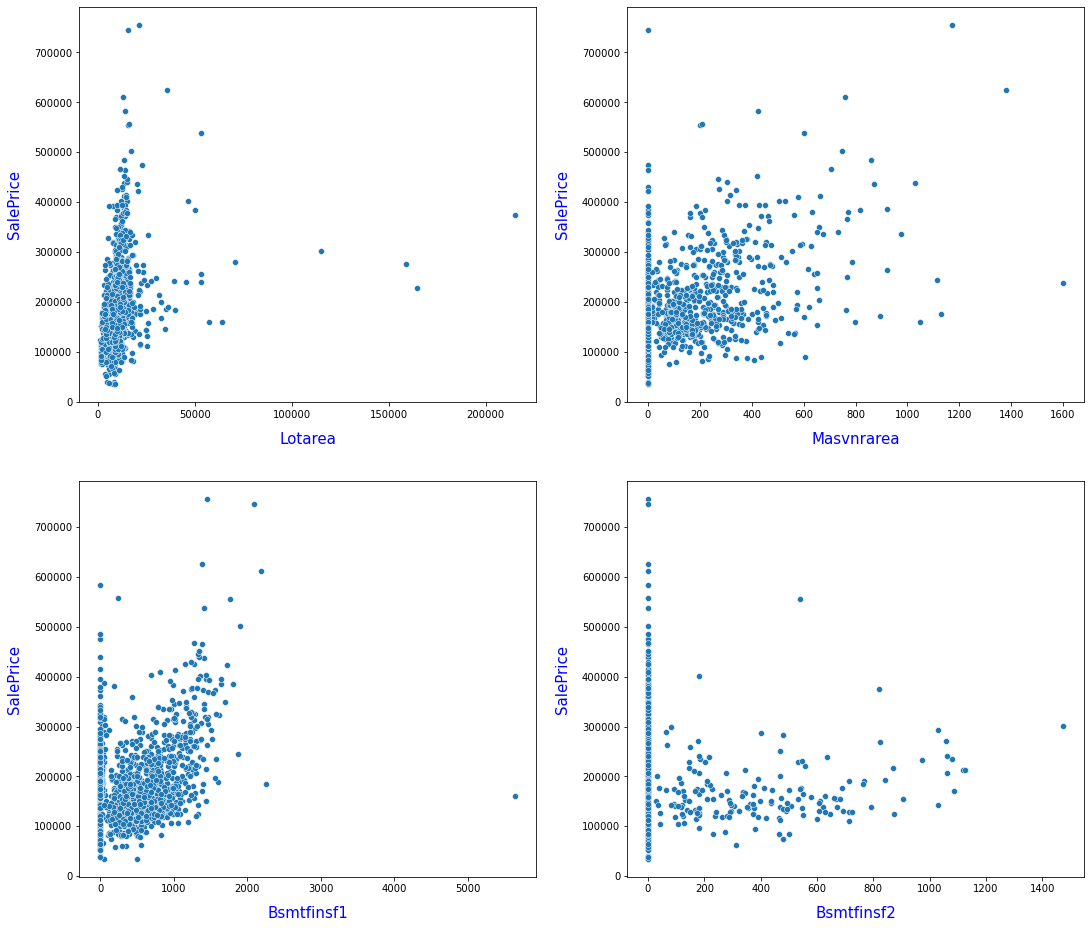

In [99]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(housing,col_names)

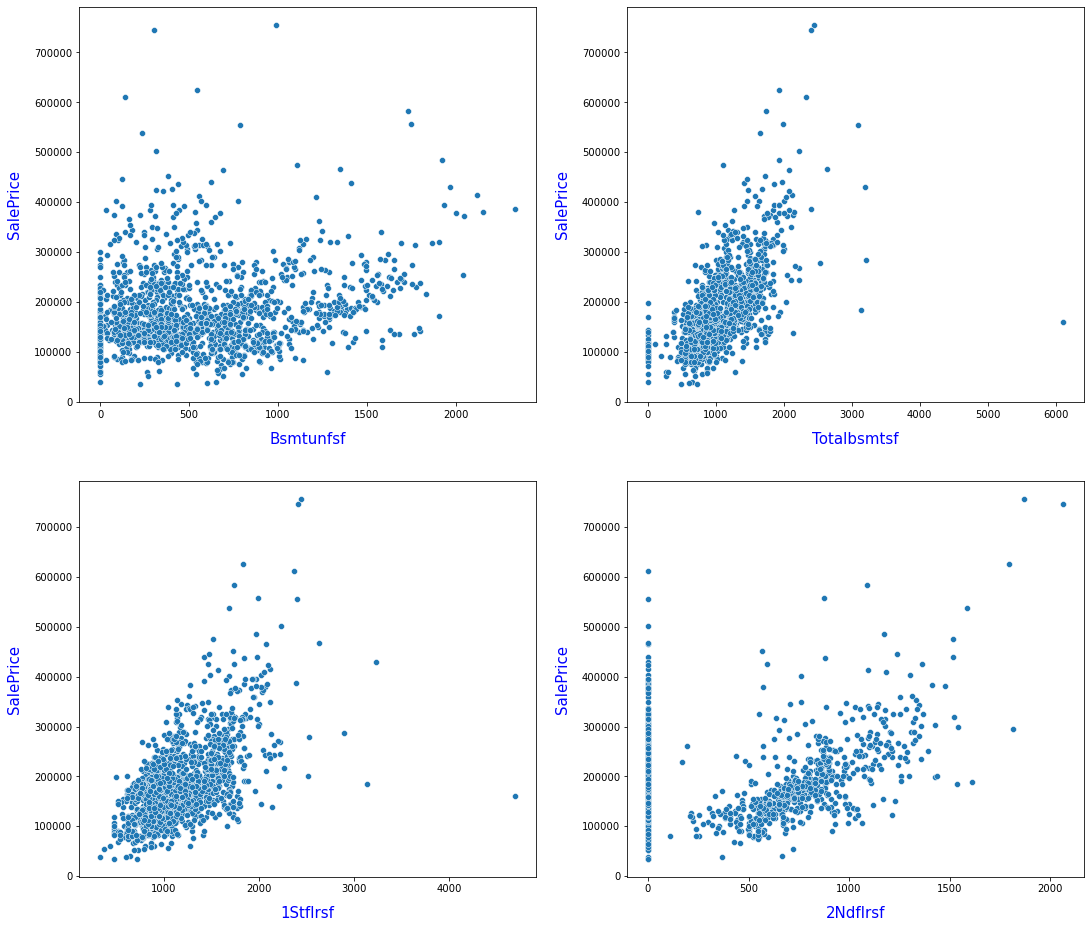

In [100]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(housing,col_names)

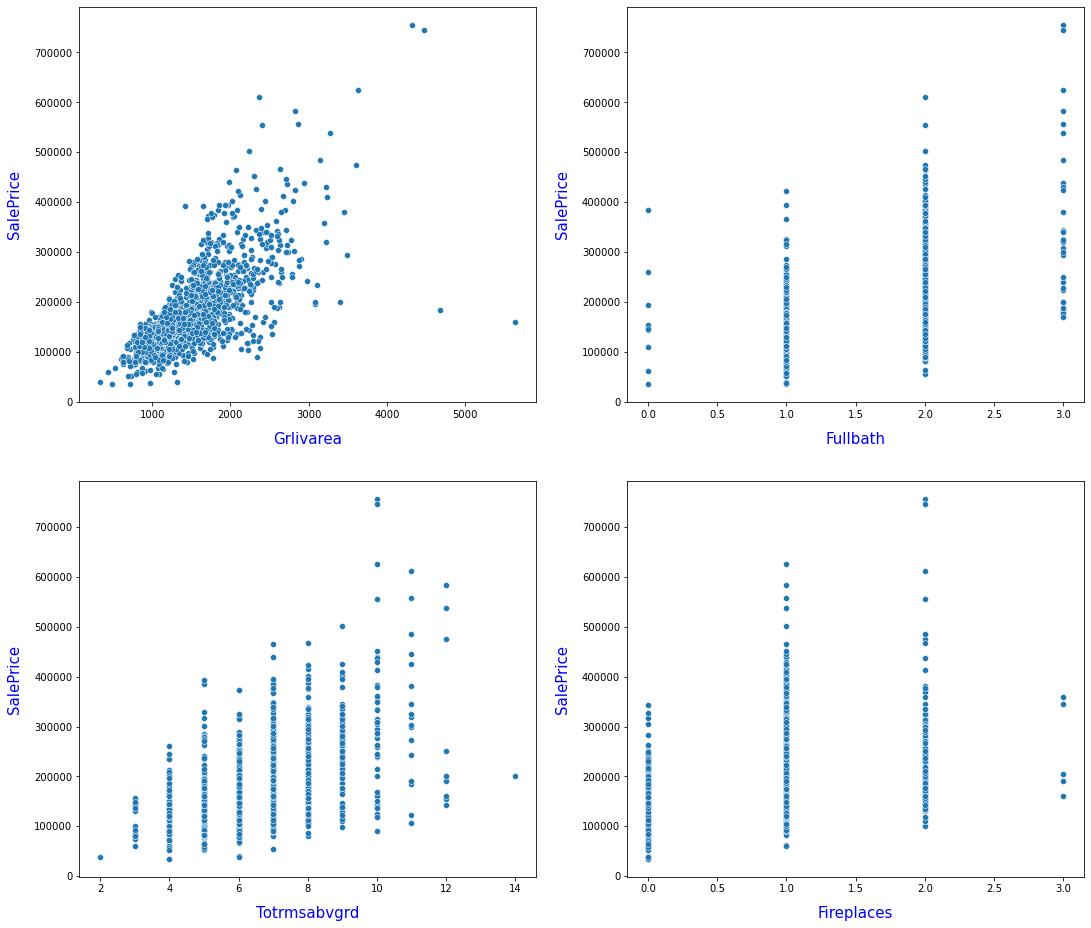

In [101]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(housing,col_names)

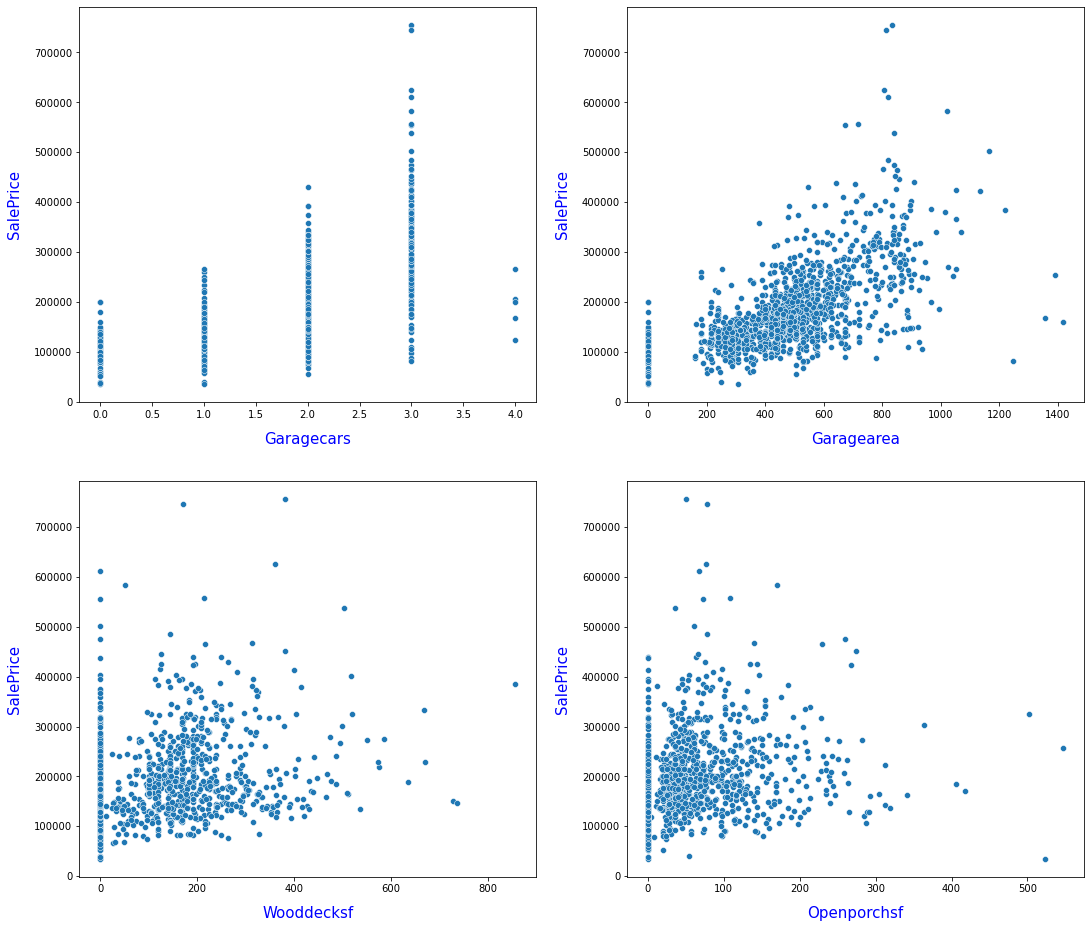

In [102]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(housing,col_names)

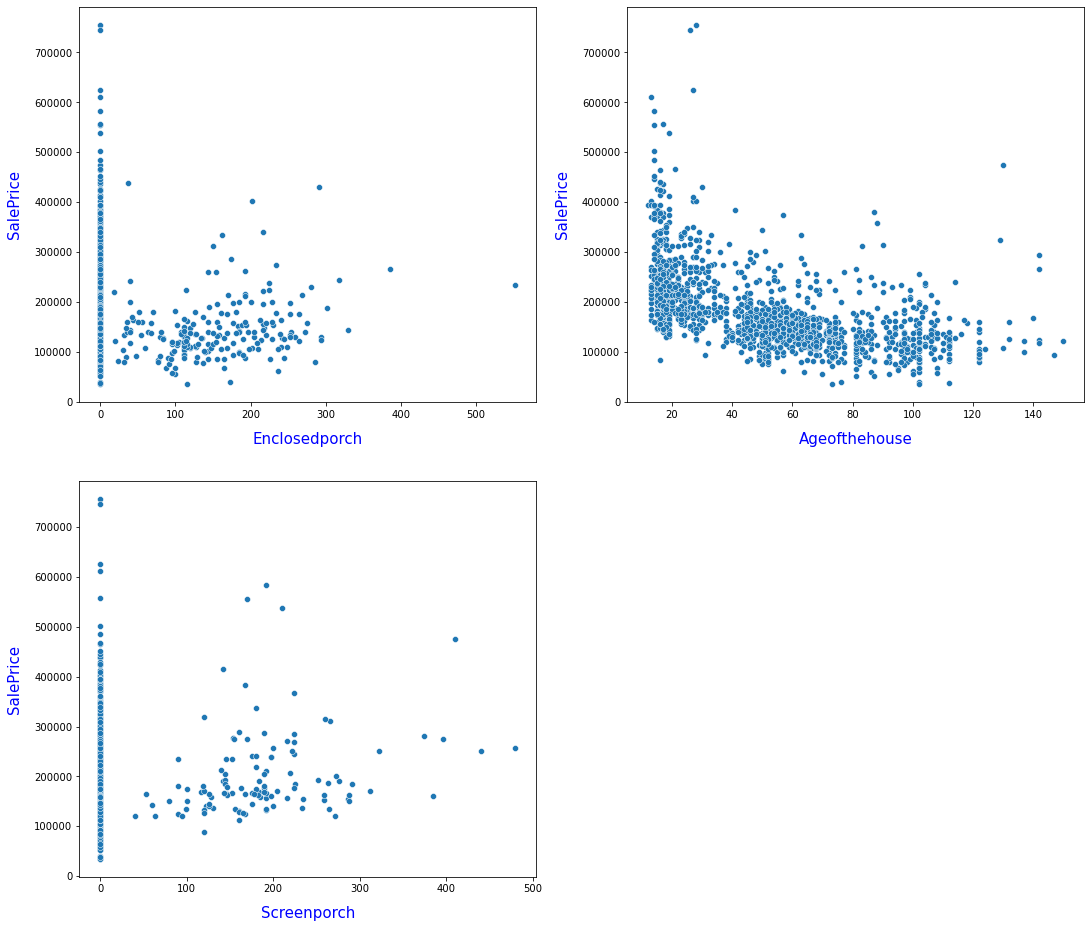

In [103]:
# Performing Bivariate analysis - Numerical vs. Numerical columns

# Randomly making groups of four colums
col_names = ['EnclosedPorch', 'AgeOftheHouse', 'ScreenPorch']


# Calling custom function for Bivariate analysis
Bivariate_ScatterAnalysis_func(housing,col_names)

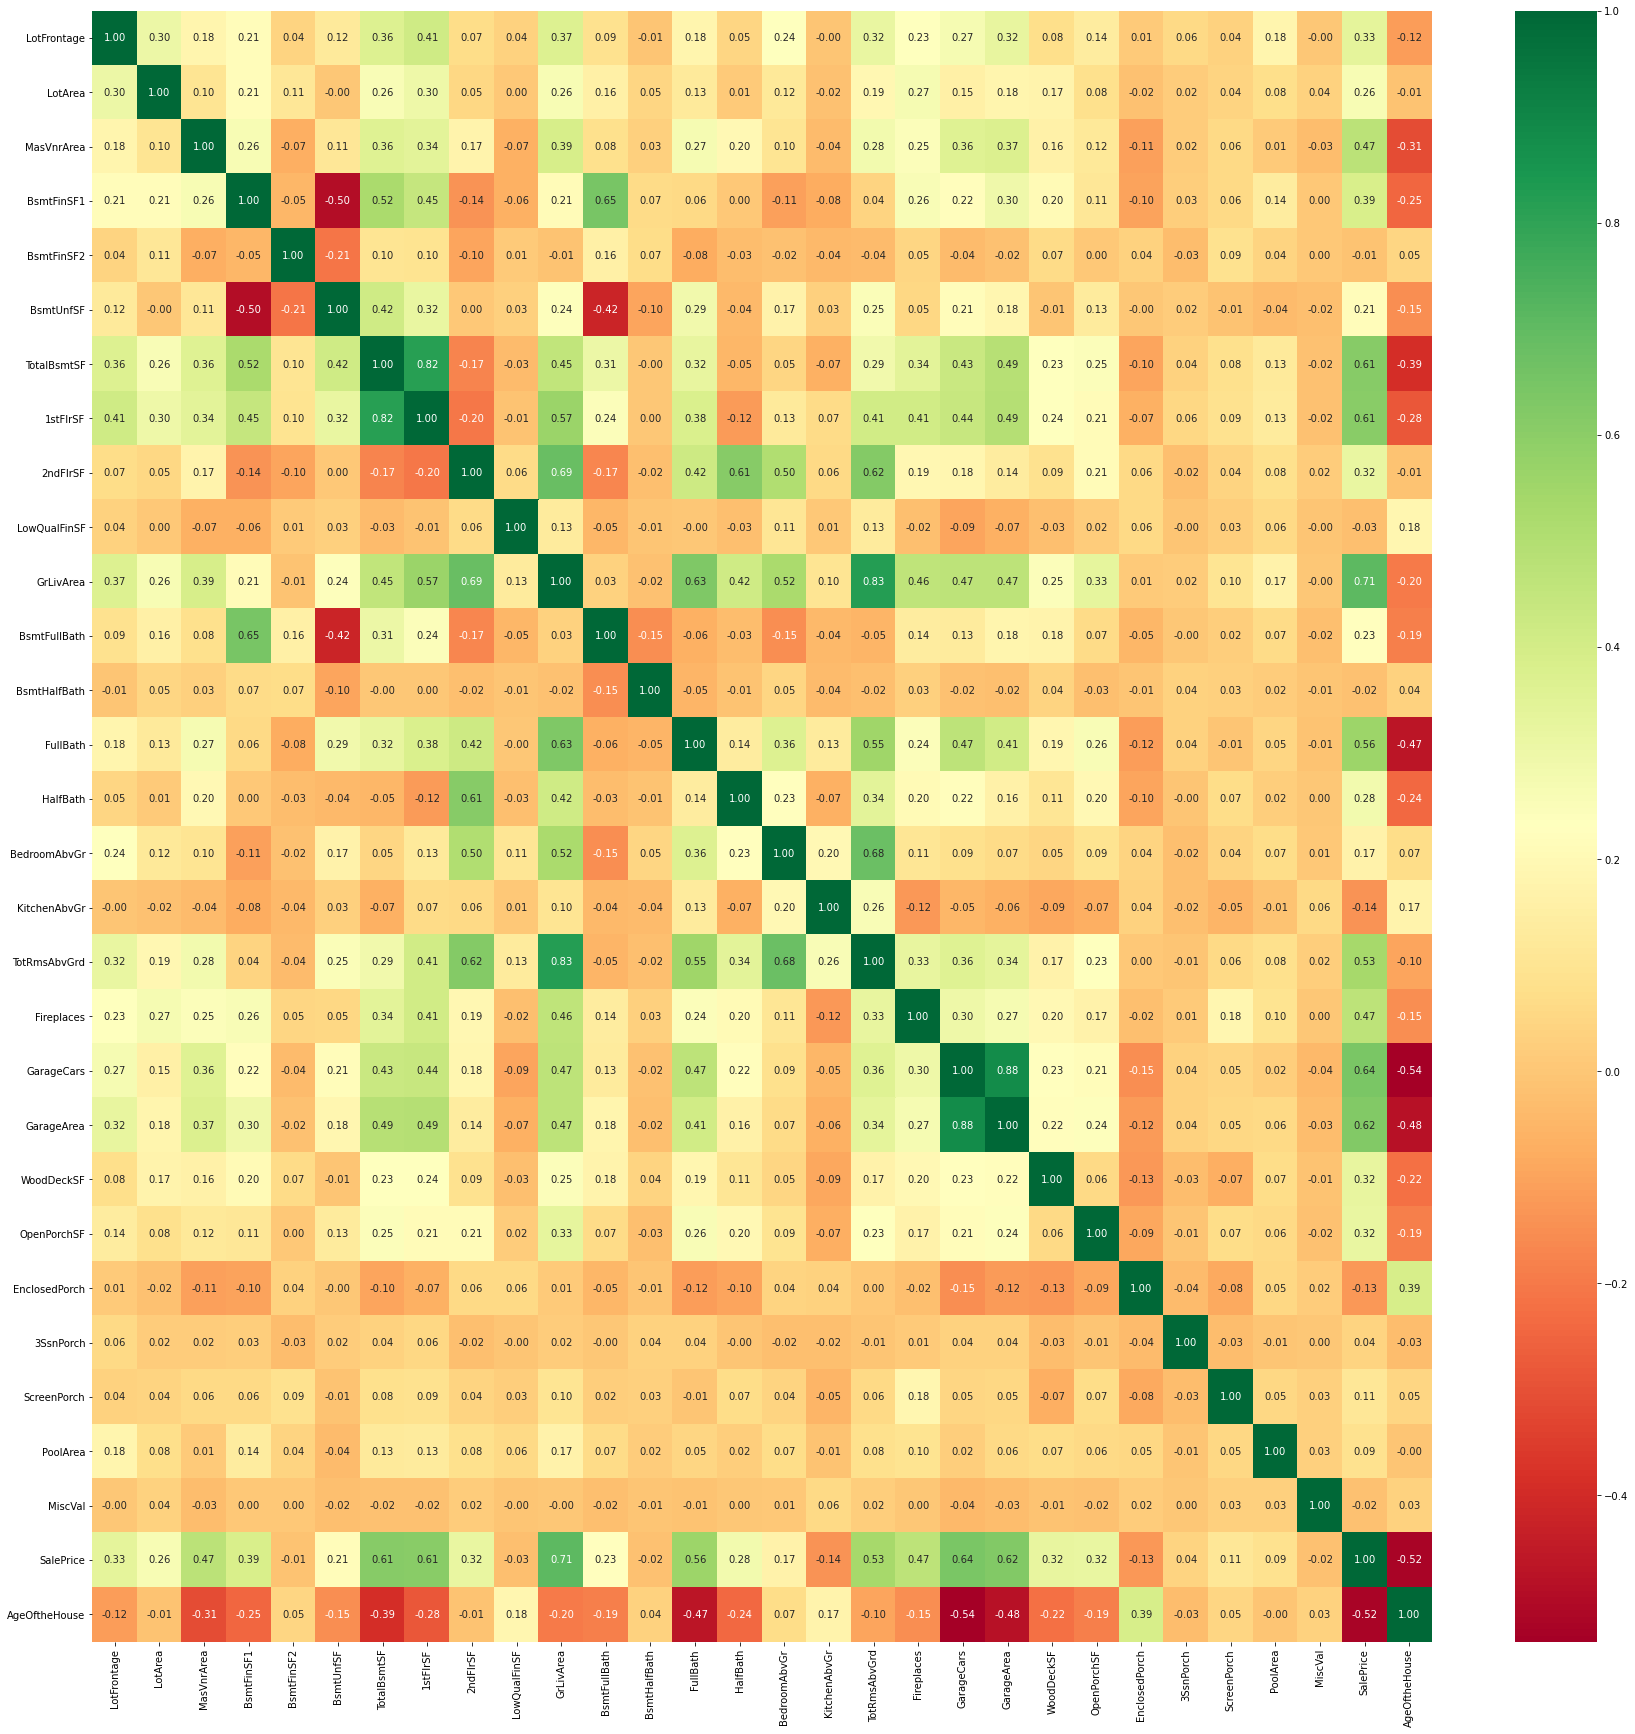

In [104]:
# Lets perform a corelation analysis on the Numerical features of the dataset
# Setting figure size
plt.figure(figsize = (30,30))

# Heatmap to check correlation with correlation coefficient
sns.heatmap(housing.corr(), annot = True, cmap = 'RdYlGn', fmt = '0.2f')

# Showing the plot using matplotlib.pyplot show() function
plt.show()

In [ ]:
# From the above corelation plot, we see there is a positive linear relation ship amongst various variables

In [ ]:
# Now lets prepare the data

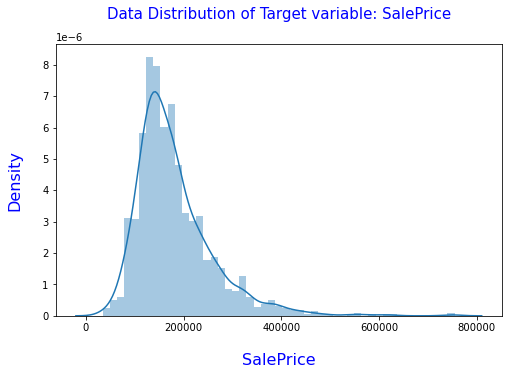

In [105]:
# Checking distribution of Target variable 'SalePrice'

# Setting figuresize
plt.figure(figsize=(8,5))

# Plotting distribution plot using seaborn library
sns.distplot(housing['SalePrice'])

# Setting axis label and display parameters
plt.xlabel('SalePrice',fontsize = 16, color = 'blue', labelpad = 20)
plt.ylabel('Density',fontsize = 16, color = 'blue', labelpad = 20)

# Setting title of the plot
plt.title("Data Distribution of Target variable: SalePrice",color='blue',fontsize=15, pad = 25)

# Showing the plot using matplotlib.pyplot show() function 
plt.show()

In [ ]:
# We see distribution of target variable is not normal
# We will perform log transformation so that the distribution becomes normal

In [106]:
# Performing Log transformation on Target variable 'SalePrice'

housing['SalePrice'] = np.log(housing['SalePrice'])

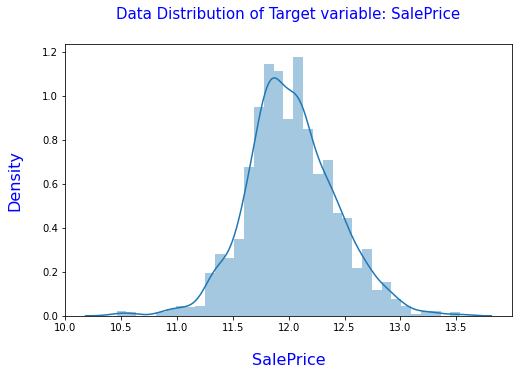

In [107]:
# Checking distribution of Target variable 'SalePrice'

# Setting figuresize
plt.figure(figsize=(8,5))

# Plotting distribution plot using seaborn library
sns.distplot(housing['SalePrice'])

# Setting axis label and display parameters
plt.xlabel('SalePrice',fontsize = 16, color = 'blue', labelpad = 20)
plt.ylabel('Density',fontsize = 16, color = 'blue', labelpad = 20)

# Setting title of the plot
plt.title("Data Distribution of Target variable: SalePrice",color='blue',fontsize=15, pad = 25)

# Showing the plot using matplotlib.pyplot show() function 
plt.show()

In [ ]:
# Now we see that the target variable is normally distributed, almost

In [108]:
# Checking all categorical columns to form dummy variables

categorical_cols = housing.select_dtypes(include = 'object').columns

# Displaying categorical column names as a list
categorical_cols_list = categorical_cols.to_list()

# Printing the list of categorical columns
print(categorical_cols_list)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleCondition']


In [110]:
# Creating dummy variables and merging with original DataFrame

# Creating dummy variables
dummy_dataFrame = pd.get_dummies(housing[categorical_cols_list], drop_first = True)

# Concating the Dummy DataFrame with the original DataFrame
housing = pd.concat([housing, dummy_dataFrame], axis = 1)

# Displaying the top 5 rows from concatenated DataFrame
housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleCondition,SalePrice,AgeOftheHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,Good,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,0,2,1,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,Normal,12.247694,19,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,Above Average,Very Good,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,1,2,0,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,Normal,12.109011,46,0,0,1,0,0,0,

In [111]:
# Dropping the original categorical features for which dummy variables have been created

housing.drop(categorical_cols_list, axis = 1, inplace = True)

In [112]:
housing.shape

(1460, 158)

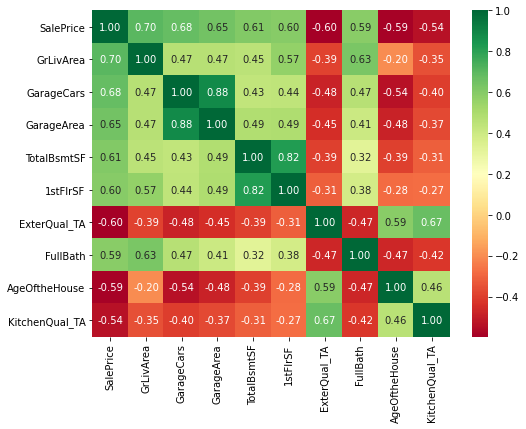

In [113]:
# Checking top 10 correlation matrix with respect to Target variable 'SalePrice'

# Creating correlation matrix of entire DataFrame
corr_matrix = housing.corr()

# Choosing number of variables for heatmap
k = 10 

# Taking absolute value of 'SalePrice' column to get the top 10 correlation
corr_matrix['SalePrice'] = abs(corr_matrix['SalePrice'])

# Selecting column name having top 10 correlation w.r.t Target variable 'SalePrice'
top10_cos = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index

# Setting figure size
plt.figure(figsize = (8,6))

# Heatmap to check correlation with correlation coefficient
sns.heatmap(surp_housing_df[top10_cos].corr(), annot = True, cmap = 'RdYlGn', fmt = '0.2f')

# Showing the plot using matplotlib.pyplot show() function
plt.show()

In [ ]:
# Lets split the data now

In [115]:
# Splitting the DataFrame into Train and Test set for modelling

housing_train_df, housing_test_df = train_test_split(housing, train_size = 0.70, random_state = 100)


In [116]:
housing_train_df.shape

(1021, 158)

In [117]:
housing_test_df.shape

(439, 158)

In [118]:
# Seperating independent (X_train) and dependent (y_train) features

y_train = housing_train_df.pop('SalePrice')
X_train = housing_train_df

# Printing the shape of each independent (X_train) and dependent (y_train) features

print(y_train.shape)
print(X_train.shape)

(1021,)
(1021, 157)


In [119]:
# Seperating independent (X_test) and dependent (y_test) features

y_test = housing_test_df.pop('SalePrice')
X_test = housing_test_df

# Printing the shape of each independent (X_test) and dependent (y_test) features

print(y_test.shape)
print(X_test.shape)

(439,)
(439, 157)


In [120]:
# Scaling train DataFrame
# Perform scalling on train dataset

# Using Standard scaler preprocessing technique to standarized data columns(excluding dummy columns)
scaler = StandardScaler()

# Creating column list to be scalled
col_scale = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'PoolArea', 'MiscVal', 'AgeOftheHouse']

# Fitting and transforming numerical columns and storing back into original train dataset
X_train[col_scale] = scaler.fit_transform(X_train[col_scale])

# Checking top 5 rows from train dataset
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOftheHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
318,0.925326,-0.057261,0.809137,1.159065,-0.293313,-0.454262,0.621091,0.511410,2.137583,-0.124502,2.121655,1.066863,-0.247791,0.784821,1.244440,1.395790,-0.234155,1.555150,0.622148,1.646935,0.867501,1.988123,0.195951,1.912645,-0.121922,-0.275126,-0.062302,-0.084263,-0.715324,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
239,-0.795709,-0.169753,-0.558025,-0.761831,-0.293313,0.172244,-0.712611,-0.931882,0.793638,-0.124502,-0.058599,-0.837450,-0.247791,-1.028080,1.244440,0.175669,-0.234155,0.308833,0.622148,-1.034916,-1.188045,-0.744598,1.405086,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.868511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0

In [121]:
# Scaling Test Dataset
# Transforming numerical columns and storing back into original test dataset
X_test[col_scale] = scaler.transform(X_test[col_scale])

# Checking top 5 rows from test dataset
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,AgeOftheHouse,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Basement,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1436,-0.433386,-0.144614,-0.558025,0.361022,-0.293313,-0.703973,-0.431488,-0.765928,-0.789230,-0.124502,-1.230557,-0.837450,-0.247791,-1.028080,-0.753316,0.175669,-0.234155,-0.937484,-0.927153,0.306009,0.264038,-0.744598,-0.710899,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,0.010600,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
57,0.880036,0.112107,-0.558025,-0.964030,-0.293313,0.660517,-0.440205,-0.775986,1.186484,-0.124502,0.379709,-0.837450,-0.247791,0.784821,1.244440,0.175669,-0.234155,0.308833,-0.927153,0.306009,0.438477,-0.744598,0.347093,-0.368121,-0.121922,-0.275126,-0.062302,-0.084263,-1.078286,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,

In [122]:
# Model Building
# Perform Automated Feature Selection using recursive feature elimination(RFE) for Linear regression 

# Creating linear regression object for performing RFE
lnreg_model = LinearRegression()
lnreg_model.fit(X_train, y_train)

# Perform recursive feature elimination (RFE) with 70 features
rfe = RFE(lnreg_model, 80)
rfe = rfe.fit(X_train, y_train)

In [123]:
# Checking RFE selected columns for linear regression modelling

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 50),
 ('LotArea', False, 49),
 ('MasVnrArea', False, 69),
 ('BsmtFinSF1', False, 24),
 ('BsmtFinSF2', False, 26),
 ('BsmtUnfSF', False, 27),
 ('TotalBsmtSF', False, 25),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 21),
 ('GrLivArea', False, 16),
 ('BsmtFullBath', False, 39),
 ('BsmtHalfBath', False, 66),
 ('FullBath', False, 29),
 ('HalfBath', False, 40),
 ('BedroomAbvGr', False, 62),
 ('KitchenAbvGr', False, 28),
 ('TotRmsAbvGrd', False, 76),
 ('Fireplaces', False, 18),
 ('GarageCars', True, 1),
 ('GarageArea', False, 75),
 ('WoodDeckSF', False, 57),
 ('OpenPorchSF', False, 73),
 ('EnclosedPorch', False, 60),
 ('3SsnPorch', False, 63),
 ('ScreenPorch', False, 59),
 ('PoolArea', False, 55),
 ('MiscVal', False, 77),
 ('AgeOftheHouse', True, 1),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', True, 1),
 ('MSSubClass_1-STORY PUD (Plann

In [126]:
# Checking importent features selected by RFE

rfe_cols = list(X_train.columns[rfe.support_])
rfe_cols


['1stFlrSF',
 '2ndFlrSF',
 'GarageCars',
 'AgeOftheHouse',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_1-STORY 1945 & OLDER',
 'MSSubClass_1-STORY 1946 & NEWER ALL STYLES',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'MSSubClass_2-STORY 1945 & OLDER',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSZoning_Others',
 'LotShape_IR3',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_Gilbert',
 'Neighborhood_IDOTRR',
 'Neighborhood_MeadowV',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_SWISU',
 'Neighborhood_SawyerW',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Timber',
 'Neighborhood_Veenker',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'OverallQual_Average

In [ ]:
# Inference, 158 column in df
# Lasso regularixation might not reduce the from such large features
# So we selected 80 features out of 158 using recurssive elemination method

In [127]:
# Checking unimportent features not selected by RFE

X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY 1946 & NEWER', 'MSSubClass_SPLIT FOYER',
       'MSSubClass_SPLIT OR MULTI-LEVEL', 'MSZoning_RL', 'MSZoning_RM',
       'LotShape_IR2', 'LotShape_Reg', 'LotConfig_Inside',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_Sawyer', 'BldgType_2fmCon',
       'BldgType_TwnhsE', 'HouseStyle_1Story', 

In [128]:
# creating the new X_train dataframe with important features

X_train_rfe = X_train[rfe_cols]

In [129]:
#Ridge Regularization
# Ridge Regularization

# considering different values of alpha for hyperparameter tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
ridge = Ridge()

# Selecting k-fold for hyperparameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing HyperParameter tuning for choosing optimal value of alpha
ridge_grid_search = GridSearchCV(estimator = ridge
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


ridge_grid_search.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   21.0s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [130]:
# Dispalying result of Grid search cross validation

# Creating dataframe for the cross validation
ridge_grid_search_cv_result = pd.DataFrame(ridge_grid_search.cv_results_)

# Displaying the resultant dataframe
ridge_grid_search_cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.286651,0.000000,0.015525,0.000000,0.001,{'alpha': 0.001},-0.013727,-0.029155,-0.017041,-0.022066,-0.014933,-0.019385,0.005656,14,-0.015532,-0.012673,-0.014984,-0.013284,-0.015057,-0.014306,0.001117
1,0.174617,0.137213,0.016129,0.000739,0.01,{'alpha': 0.01},-0.013716,-0.029171,-0.017026,-0.022062,-0.014927,-0.019380,0.005666,13,-0.015532,-0.012673,-0.014984,-0.013284,-0.015057,-0.014306,0.001117
2,0.013627,0.006814,0.009660,0.007904,0.05,{'alpha': 0.05},-0.013668,-0.029237,-0.016965,-0.022045,-0.014901,-0.019363,0.005706,11,-0.015533,-0.012674,-0.014986,-0.013285,-0.015058,-0.014307,0.001117
3,0.015627,0.000005,0.009372,0.007653,0.1,{'alpha': 0.1},-0.013613,-0.029318,-0.016907,-0.022026,-0.014869,-0.019347,0.005753,10,-0.015537,-0.012677,-0.014991,-0.013289,-0.015062,-0.014311,0.001118
4,0.012497,0.006248,0.005322,0.006680,0.2,{'alpha': 0.2},-0.013516,-0.029469,-0.016828,-0.021992,-0.014813,-0.019324,0.005837,9,-0.015549,-0.012687,-0.015007,-0.013301,-0.015075,-0.014324,0.001119
5,0.012850,0.002279,0.006256,0.007662,0.3,{'alpha': 0.3},-0.013433,-0.029608,-0.016780,-0.021965,-0.014764,-0.019310,0.005911,8,-0.015568,-0.012701,-0.015028,-0.013318,-0.015094,-0.014342,0.001121
6,0.012309,0.007544,0.011761,0.005833,0.4,{'alpha': 0.4},-0.013361,-0.029734,-0.016750,-0.021942,-0.014721,-0.019302,0.005976,6,-0.015590,-0.012716,-0.015051,-0.013339,-0.015117,-0.014363,0.001123
7,0.012258,0.005709,0.006390,0.006748,0.5,{'alpha': 0.5},-0.013300,-0.029850,-0.016731,-0.021924,-0.014682,-0.019297,0.006035,4,-0.015616,-0.012734,-0.015075,-0.013363,-0.015143,-0.014386,0.001126
8,0.010168,0.006692,0.012085,0.006113,0.6,{'alpha': 0.6},-0.013246,-0.029957,-0.016717,-0.021909,-0.014648,-0.019295,0.006088,2,-0.015643,-0.012752,-0.015101,-0.013389,-0.015170,-0.014411,0.001128
9,0.012699,0.004126,0.008857,0.007965,0.7,{'alpha': 0.7},-0.013199,-0.030056,-0.016708,-0.021897,-0.014617,-0.019295,0.006137,1,-0.015672,-0.012770,-0.015126,-0.013416,-0.015199,-0.014437,0.001131


In [131]:
# Custom function for Plotting mean test and train scoes with Alpha hyper parameter

# Function Input: CV Result DataFrame
# Function Output: Returns None

def get_opt_alpha_plot(grid_search_cv_result, scale = 'log'):

    # Setting figuresize
    plt.figure(figsize=(8,5))
    
    # Plotting Line plot using matplotlib library for param_alpha vs. mean_train_score
    plt.plot(grid_search_cv_result['param_alpha'].astype('float32'), grid_search_cv_result['mean_train_score'])
    
    # Plotting Line plot using matplotlib library for param_alpha vs. mean_test_score
    plt.plot(grid_search_cv_result['param_alpha'].astype('float32'), grid_search_cv_result['mean_test_score'])
    
    
    # Setting axis label and display parameters
    plt.xlabel('Alpha',fontsize = 16, color = 'blue', labelpad = 20)
    plt.ylabel('Negative Mean Squared Error',fontsize = 16, color = 'blue', labelpad = 20)
    
    # Setting scale
    if scale != '':
        plt.xscale(scale)
    
    # Setting title of the plot
    plt.title("Alpha vs. Negative Mean Squared Error",color='blue',fontsize=15, pad = 25)
    
    # Setting legend
    plt.legend(['train score', 'test score'], loc='upper right')
    
    # Showing the plot using matplotlib.pyplot show() function 
    plt.show()

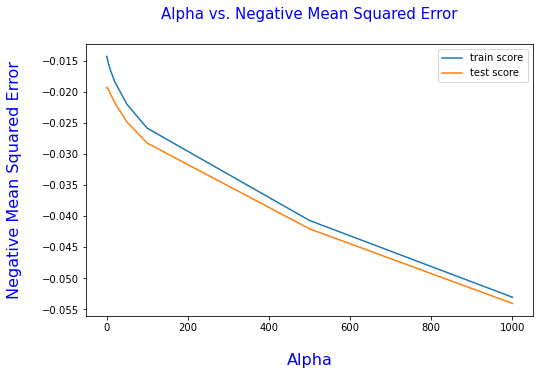

In [132]:
# Calling for Plotting mean test and train scoes with Alpha hyper parameter for Ridge regularization

get_opt_alpha_plot(ridge_grid_search_cv_result,'')

In [133]:
# Displaying best estimator returned from Grid Search Cross Validation for Ridge Regression

# Storing best estimator in a variable
ridge_best = ridge_grid_search.best_estimator_

# Displaying the best estimator variable
ridge_best

Ridge(alpha=0.7)

In [134]:
# Diaplaying best score for Ridge regularization

ridge_grid_search.best_score_

-0.01929525888164258

In [135]:
# Diaplaying best parameter value (Alpha) for Ridge regularization

ridge_alpha = ridge_grid_search.best_params_
ridge_alpha

{'alpha': 0.7}

In [ ]:
# After hyperparameter tuning, we got alpha as 0.7
# Lets fit the model with best alpha

In [136]:
# Fitting model with best estimator received from Ridge regression

ridge_best.fit(X_train_rfe, y_train)

Ridge(alpha=0.7)

In [137]:
# Predicting the target variable on the train dataset

y_train_predicted = ridge_best.predict(X_train_rfe)

In [138]:
# Custom function for calculating evaluation metrics

# Function Input: label, y_true value, y_predicted value
# Function Output: Returns None

def evaluation_metric_func(label, y_true, y_predicted):  
   
    # Calculating Mean Squared error
    mse = mean_squared_error(y_true, y_predicted)
    
    # Calculating Root Mean Squared error
    rmse = np.sqrt(mean_squared_error(y_true, y_predicted))
    
    # Calculating r2 Score
    r2_square = r2_score(y_true, y_predicted)
    
    # Printing evaluation metrics
    print("------------------------------------")
    print(label + ": Evaluation metrics")
    print("------------------------------------")
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square:', r2_square)

In [139]:
# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Ridge Regression", y_train, y_train_predicted)

Train Dataset:
------------------------------------
Ridge Regression: Evaluation metrics
------------------------------------
MSE: 0.014837397564007357
RMSE: 0.12180885667309811
R2 Square: 0.9055811035739851


In [ ]:
# R-squared train dataset is 0.9029 or 90.29%, 90.29% variance in it.
# very good r2_score value.
# calculated MSE = 0.0152568 and RMSE = 0.1235.
# the low the value of MSE the better the model, predicted model is a good model.

In [140]:
# Diaplaying the Ridge Regression model parameters

# Creating empty dataframe
ridge_coef_df = pd.DataFrame()

# Getting the model coefficients
ridge_coef = list(ridge_best.coef_)

# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = ridge_coef

# Diaplaying the dataframe of Regression model parameters
ridge_coef_df

,Features,Coefficient
0,1stFlrSF,0.109181
1,2ndFlrSF,0.111558
2,GarageCars,0.048831
3,AgeOftheHouse,-0.053385
4,MSSubClass_1-1/2 STORY FINISHED ALL AGES,0.034747
5,MSSubClass_1-STORY 1945 & OLDER,-0.055596
6,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.050430
7,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.039389
8,MSSubClass_2-1/2 STORY ALL AGES,0.098807
9,MSSubClass_2-STORY 1945 & OLDER,0.046134


In [141]:
# Displaying the intercept ofthe Ridge model

print('Intercept of Ridge Regression Model: ', ridge_best.intercept_)

Intercept of Ridge Regression Model:  12.239366273938447


In [142]:
# Displaying top 10 best features that describes the price of the house

ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
41,OverallQual_Poor,-0.394913
38,OverallQual_Excellent,0.227101
48,OverallCond_Fair,-0.221398
49,OverallCond_Very Poor,-0.184210
44,OverallQual_Very Poor,-0.184210
25,Neighborhood_NoRidge,0.164855
20,Neighborhood_Crawfor,0.157499
18,Neighborhood_ClearCr,0.157266
30,Neighborhood_Somerst,0.150472
26,Neighborhood_NridgHt,0.149304


In [143]:
# creating the new X_train dataframe with important features

X_test_rfe = X_test[rfe_cols]

In [144]:
# Predicting the target variable on the test dataset

y_test_predicted = ridge_best.predict(X_test_rfe)

In [145]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Ridge Regression", y_test, y_test_predicted)

Test Dataset:
------------------------------------
Ridge Regression: Evaluation metrics
------------------------------------
MSE: 0.02093971313917017
RMSE: 0.14470560852700276
R2 Square: 0.8729500249966605


In [ ]:
# R-squared train dataset is 0.8729 or 87.29%, 87.29% variance in it.
# very good r2_score value.
# calculated MSE = 0.020939 and RMSE = 0.14470.
# the low the value of MSE the better the model, predicted model is a good model.

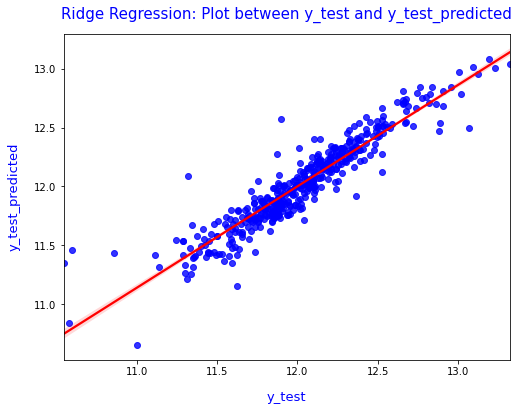

In [146]:
# Plotting y_test and y_test_predicted to understand the variance in test dataset

# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Ridge Regression: Plot between y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

In [ ]:
# From above, we see that regression plot between y_test and y_test_pred predicted values are equally distributed along the regression line/ best fit line.

# Which means, predicted model can generalize the output based on unknown dataset.

In [147]:
# Lasso Regularization

# considering different values of alpha for hyper parameter tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
lasso = Lasso()

# Selecting k-fold for hyper parameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing Hyper Parameter tuning for choosing optimal value of alpha
lasso_grid_search = GridSearchCV(estimator = lasso
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


lasso_grid_search.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    4.2s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [148]:
# Dispalying result of Grid search cross validation

# Creating dataframe for the cross validation
lasso_grid_search_cv_result = pd.DataFrame(lasso_grid_search.cv_results_)

# Displaying the resultant dataframe
lasso_grid_search_cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.081166,0.141721,0.005855,0.002213,0.001,{'alpha': 0.001},-0.015455,-0.036804,-0.018550,-0.023476,-0.016099,-0.022077,0.007885,1,-0.018751,-0.015132,-0.017845,-0.016557,-0.018305,-0.017318,0.001316
1,0.013213,0.002259,0.007075,0.000792,0.01,{'alpha': 0.01},-0.031611,-0.056371,-0.033456,-0.042408,-0.029325,-0.038634,0.009916,2,-0.038491,-0.032563,-0.038263,-0.035300,-0.038380,-0.036599,0.002345
2,0.015211,0.001892,0.006727,0.002083,0.05,{'alpha': 0.05},-0.043660,-0.060062,-0.045271,-0.052367,-0.043175,-0.048907,0.006481,3,-0.049242,-0.042712,-0.049224,-0.046446,-0.049667,-0.047459,0.002636
3,0.011974,0.002400,0.004868,0.001718,0.1,{'alpha': 0.1},-0.066729,-0.074351,-0.070135,-0.076047,-0.067571,-0.070967,0.003673,4,-0.070967,-0.065434,-0.070885,-0.069173,-0.071225,-0.069537,0.002176
4,0.014243,0.001815,0.006713,0.002511,0.2,{'alpha': 0.2},-0.107840,-0.130740,-0.127928,-0.132504,-0.126777,-0.125158,0.008892,5,-0.121630,-0.124204,-0.125263,-0.122802,-0.125865,-0.123953,0.001559
5,0.015382,0.003235,0.008011,0.001776,0.3,{'alpha': 0.3},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
6,0.014165,0.001929,0.009293,0.001255,0.4,{'alpha': 0.4},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
7,0.014017,0.001867,0.009762,0.001901,0.5,{'alpha': 0.5},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
8,0.018224,0.005762,0.008430,0.000818,0.6,{'alpha': 0.6},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
9,0.013255,0.000474,0.002860,0.002582,0.7,{'alpha': 0.7},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464


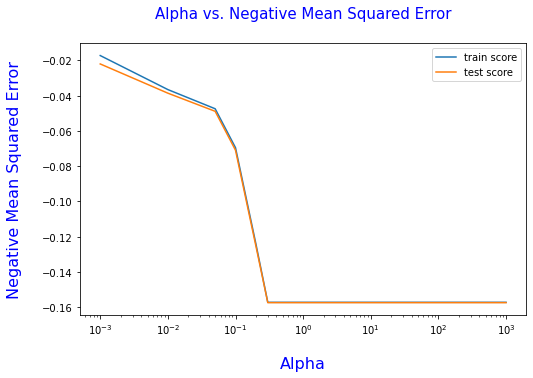

In [149]:
# Calling for Plotting mean test and train scoes with Alpha hyper parameter for Lasso regularization

get_opt_alpha_plot(lasso_grid_search_cv_result)

In [150]:
# Displaying best estimator returned from Grid Search Cross Validation for Lasso Regression

# Storing best estimator in a variable
lasso_best = lasso_grid_search.best_estimator_

# Displaying the best estimator variable
lasso_best

Lasso(alpha=0.001)

In [151]:
# Diaplaying best score for Lasso regularization

lasso_grid_search.best_score_

-0.02207701139052412

In [152]:
# Diaplaying best parameter value (Alpha) for Ridge regularization

lasso_alpha = lasso_grid_search.best_params_
lasso_alpha

{'alpha': 0.001}

In [153]:
# Fitting model with best estimator received from Ridge regression

lasso_best.fit(X_train_rfe, y_train)

Lasso(alpha=0.001)

In [154]:
# Predicting the target variable on the train dataset

y_train_predicted = lasso_best.predict(X_train_rfe)

In [155]:
# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Lasso Regression", y_train, y_train_predicted)

Train Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.01786892917643991
RMSE: 0.13367471405033904
R2 Square: 0.8862897239306435


In [ ]:
# R-squared train dataset is 0.8862 or 88.62%, 88.62% variance in it.
# very good r2_score value.
# calculated MSE = 0.0178689 and RMSE = 0.1336747.
# the low the value of MSE the better the model, predicted model is a good model.

In [156]:
# Diaplaying the Ridge Regression model parameters

# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Getting the model coefficients
lasso_coef = list(lasso_best.coef_)

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

,Features,Coefficient
0,1stFlrSF,0.128535
1,2ndFlrSF,0.124730
2,GarageCars,0.057018
3,AgeOftheHouse,-0.070963
4,MSSubClass_1-1/2 STORY FINISHED ALL AGES,0.019737
5,MSSubClass_1-STORY 1945 & OLDER,-0.061336
6,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.044543
7,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,-0.000000
8,MSSubClass_2-1/2 STORY ALL AGES,0.000000
9,MSSubClass_2-STORY 1945 & OLDER,0.018826


In [157]:
# Displaying the intercept ofthe Lasso model

print('Intercept of Lasso Regression Model: ', lasso_best.intercept_)

Intercept of Lasso Regression Model:  12.0845829197455


In [158]:
# Displaying top 10 best features that describes the price of the house

top10_lasso_df = lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

# Displaying dataframe with top 10 feature returned from lasso model
top10_lasso_df

,Features,Coefficient
38,OverallQual_Excellent,0.241190
48,OverallCond_Fair,-0.213345
61,BsmtQual_No Basement,-0.171611
43,OverallQual_Very Good,0.148668
20,Neighborhood_Crawfor,0.139267
0,1stFlrSF,0.128535
1,2ndFlrSF,0.124730
26,Neighborhood_NridgHt,0.106939
46,OverallCond_Below Average,-0.093519
63,BsmtExposure_Gd,0.093118


In [159]:
# Selecting top 5 best features returned from Lasso Model

top5_lasso_features = top10_lasso_df['Features'].iloc[:5].to_list()

In [160]:
# Predicting the target variable on the test dataset

y_test_predicted = lasso_best.predict(X_test_rfe)

In [161]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Lasso Regression", y_test, y_test_predicted)

Test Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.022334359208428613
RMSE: 0.14944684408989242
R2 Square: 0.8644881254921093


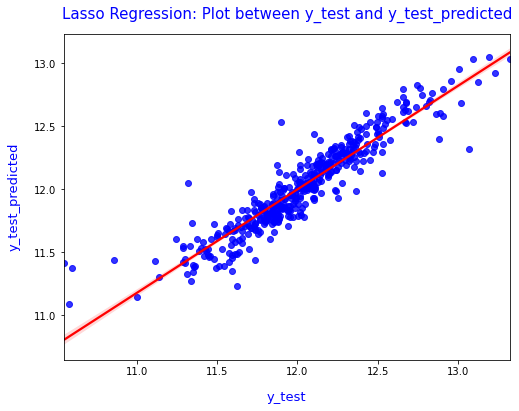

In [162]:
# Plotting y_test and y_test_predicted to understand the variance in test dataset

# Setting the figure size
plt.figure(figsize=(8,6))

#Ploting the regression plot
sns.regplot(y_test,y_test_predicted,ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Setting the format of the plot
plt.title('Lasso Regression: Plot between y_test and y_test_predicted', fontsize=15,color='blue',pad=15)             
plt.xlabel('y_test', fontsize=13,color='blue',labelpad=14)                          
plt.ylabel('y_test_predicted', fontsize=13,color='blue',labelpad=14)     

# Displaying the plot usong matplotlib.pyplot
plt.show()

In [ ]:
# From above, we see that regression plot between y_test and y_test_pred predicted values are equally distributed along the regression line/ best fit line.

# Which means, predicted model can generalize the output based on unknown dataset.

In [ ]:
Conclusion
Ridge Regularization (alpha = 0.7)
Lasso Regularization (alpha = 0.001)

Subjective Questions

Question 1:
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose to double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [163]:
# The optimal value of alpha for ridge and lasso regression

alpha_ridge = list(ridge_alpha.values())[0]
alpha_lasso = list(lasso_alpha.values())[0]

print('Optimal value of alpha for Ridge Regression: {0}'.format(alpha_ridge))
print('Optimal value of alpha for Lasso Regression: {0}'.format(alpha_lasso))

Optimal value of alpha for Ridge Regression: 0.7
Optimal value of alpha for Lasso Regression: 0.001


In [164]:
# Doubling the value of alpha in both Ridge and Lasso Model

new_alpha_ridge = alpha_ridge * 2
new_alpha_lasso = alpha_lasso * 2

print('After choosing double value of alpha for Ridge Regression, new alpha is: {0}'.format(new_alpha_ridge))
print('After choosing double value of alpha for Lasso Regression, new alpha is: {0}'.format(new_alpha_lasso))

After choosing double value of alpha for Ridge Regression, new alpha is: 1.4
After choosing double value of alpha for Lasso Regression, new alpha is: 0.002


In [165]:
# Fitting Ridge Regression model with new alpha

ridge_new = Ridge(alpha = new_alpha_ridge)

# Fitting the model
ridge_new.fit(X_train_rfe,y_train)

# Perform prediction with new model
y_train_predicted_new = ridge_new.predict(X_train_rfe)

In [166]:

# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Ridge Regression", y_train, y_train_predicted_new)

Train Dataset:
------------------------------------
Ridge Regression: Evaluation metrics
------------------------------------
MSE: 0.014990790576871362
RMSE: 0.12243688405407646
R2 Square: 0.9046049755884944


In [167]:
# Diaplaying the Ridge Regression model parameters

# Creating empty dataframe
ridge_coef_df = pd.DataFrame()

# Getting the model coefficients
ridge_coef = list(ridge_new.coef_)

# Creating 'Features' column of dataframe and populating data
ridge_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
ridge_coef_df['Coefficient'] = ridge_coef

# Displaying top 10 best features that describes the price of the house
ridge_coef_df.reindex(ridge_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
41,OverallQual_Poor,-0.309161
38,OverallQual_Excellent,0.221562
48,OverallCond_Fair,-0.215513
25,Neighborhood_NoRidge,0.153925
20,Neighborhood_Crawfor,0.153544
18,Neighborhood_ClearCr,0.148432
43,OverallQual_Very Good,0.143701
26,Neighborhood_NridgHt,0.143318
49,OverallCond_Very Poor,-0.142575
44,OverallQual_Very Poor,-0.142575


In [168]:
# Displaying the intercept ofthe Ridge model

print('Intercept of Ridge Regression Model: ', ridge_new.intercept_)

Intercept of Ridge Regression Model:  12.223003653047254


In [169]:
# Predicting the target variable on the test dataset

y_test_predicted_new = ridge_new.predict(X_test_rfe)

In [170]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Ridge Regression", y_test, y_test_predicted_new)

Test Dataset:
------------------------------------
Ridge Regression: Evaluation metrics
------------------------------------
MSE: 0.020782593209280265
RMSE: 0.1441616911987379
R2 Square: 0.8739033371567826


In [171]:
# Fitting Lasso Regression model with new alpha

lasso_new = Lasso(alpha = new_alpha_lasso)

# Fitting the model
lasso_new.fit(X_train_rfe,y_train)

# Perform prediction with new model
y_train_predicted_new = lasso_new.predict(X_train_rfe)

In [172]:
# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Lasso Regression", y_train, y_train_predicted_new)

Train Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.02065304385208555
RMSE: 0.1437116691576768
R2 Square: 0.868572800591229


In [173]:
# Diaplaying the Lasso Regression model parameters

# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Getting the model coefficients
lasso_coef = list(lasso_new.coef_)

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train_rfe.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef

# Displaying the dataframe with model parameters
lasso_coef_df

,Features,Coefficient
0,1stFlrSF,0.138228
1,2ndFlrSF,0.128960
2,GarageCars,0.063766
3,AgeOftheHouse,-0.085111
4,MSSubClass_1-1/2 STORY FINISHED ALL AGES,0.007205
5,MSSubClass_1-STORY 1945 & OLDER,-0.046482
6,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.038485
7,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,0.000000
8,MSSubClass_2-1/2 STORY ALL AGES,0.000000
9,MSSubClass_2-STORY 1945 & OLDER,0.003656


In [174]:
# Displaying top 10 best features that describes the price of the house

lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
38,OverallQual_Excellent,0.217911
48,OverallCond_Fair,-0.146438
43,OverallQual_Very Good,0.142147
0,1stFlrSF,0.138228
61,BsmtQual_No Basement,-0.135329
1,2ndFlrSF,0.128960
20,Neighborhood_Crawfor,0.125093
26,Neighborhood_NridgHt,0.089557
63,BsmtExposure_Gd,0.088598
3,AgeOftheHouse,-0.085111


In [175]:
# Displaying the intercept ofthe Ridge model

print('Intercept of Lasso Regression Model: ', lasso_new.intercept_)

Intercept of Lasso Regression Model:  12.048652722576163


In [176]:
# Predicting the target variable on the test dataset

y_test_predicted_new = lasso_new.predict(X_test_rfe)

In [177]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Lasso Regression", y_test, y_test_predicted_new)

Test Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.024817493823541793
RMSE: 0.15753569063403314
R2 Square: 0.8494219118967611


Question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [178]:
# Dropping the five most important predictor variables in the lasso model 

X_train_rfe_new = X_train_rfe.drop(top5_lasso_features, axis = 1)

In [179]:
# Lasso Regularization

# considering different values of alpha for hyper parameter tuning
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Creating object of Ridge regression
lasso = Lasso()

# Selecting k-fold for hyper parameter tuning
kfold = KFold(n_splits = 5, shuffle = True, random_state = 100)

# Performing Hyper Parameter tuning for choosing optimal value of alpha
lasso_grid_search = GridSearchCV(estimator = lasso
                            , param_grid = params
                            , scoring = 'neg_mean_squared_error'
                            , cv = kfold
                            , verbose = 1
                            , n_jobs = -1
                            , return_train_score = True)


lasso_grid_search.fit(X_train_rfe_new,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 120 out of 135 | elapsed:    3.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    3.9s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [180]:
# Dispalying result of Grid search cross validation

# Creating dataframe for the cross validation
lasso_grid_search_cv_result = pd.DataFrame(lasso_grid_search.cv_results_)

# Displaying the resultant dataframe
lasso_grid_search_cv_result


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.024508,0.010361,0.004272,0.002596,0.001,{'alpha': 0.001},-0.016595,-0.040276,-0.021398,-0.028155,-0.018148,-0.024914,0.008647,1,-0.021242,-0.017831,-0.020468,-0.018464,-0.021038,-0.019809,0.001394
1,0.014335,0.007169,0.005730,0.003310,0.01,{'alpha': 0.01},-0.032135,-0.056894,-0.033856,-0.042881,-0.029792,-0.039112,0.009936,2,-0.038904,-0.032992,-0.038916,-0.035614,-0.038939,-0.037073,0.002409
2,0.010694,0.001101,0.006037,0.000893,0.05,{'alpha': 0.05},-0.043660,-0.060062,-0.045271,-0.052367,-0.043175,-0.048907,0.006481,3,-0.049242,-0.042712,-0.049224,-0.046446,-0.049667,-0.047459,0.002636
3,0.009492,0.002041,0.004480,0.003505,0.1,{'alpha': 0.1},-0.066729,-0.074351,-0.070135,-0.076047,-0.067571,-0.070967,0.003673,4,-0.070967,-0.065434,-0.070885,-0.069173,-0.071225,-0.069537,0.002176
4,0.010465,0.001747,0.005311,0.001180,0.2,{'alpha': 0.2},-0.107840,-0.130740,-0.127928,-0.132504,-0.126777,-0.125158,0.008892,5,-0.121630,-0.124204,-0.125263,-0.122802,-0.125865,-0.123953,0.001559
5,0.005521,0.006491,0.009675,0.006244,0.3,{'alpha': 0.3},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
6,0.009068,0.001958,0.005354,0.002769,0.4,{'alpha': 0.4},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
7,0.006989,0.002731,0.007618,0.003080,0.5,{'alpha': 0.5},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
8,0.008229,0.000797,0.003759,0.002076,0.6,{'alpha': 0.6},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464
9,0.009172,0.008615,0.004095,0.005902,0.7,{'alpha': 0.7},-0.138138,-0.165224,-0.159948,-0.163207,-0.160061,-0.157315,0.009793,6,-0.161957,-0.155127,-0.156450,-0.155678,-0.156431,-0.157129,0.002464


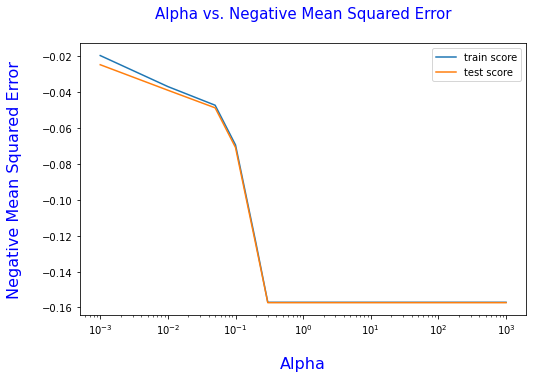

In [181]:
# Calling for Plotting mean test and train scoes with Alpha hyper parameter for Lasso regularization

get_opt_alpha_plot(lasso_grid_search_cv_result)

In [183]:
# Displaying best estimator returned from Grid Search Cross Validation for Lasso Regression

# Storing best estimator in a variable
lasso_best = lasso_grid_search.best_estimator_

# Displaying the best estimator variable
lasso_best

Lasso(alpha=0.001)

In [184]:
# Diaplaying best score for Lasso regularization

lasso_grid_search.best_score_

-0.02491429673824415

In [185]:
# Diaplaying best parameter value (Alpha) for Ridge regularization

lasso_alpha = lasso_grid_search.best_params_
lasso_alpha

{'alpha': 0.001}

In [186]:
# Fitting model with best estimator received from Ridge regression

lasso_best.fit(X_train_rfe_new, y_train)

Lasso(alpha=0.001)

In [187]:
# Predicting the target variable on the train dataset

y_train_predicted = lasso_best.predict(X_train_rfe_new)

In [188]:
# Custom function for calculating evaluation metrics of Train Dataset

print("Train Dataset:")
evaluation_metric_func("Lasso Regression", y_train, y_train_predicted)

Train Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.02043438194468768
RMSE: 0.1429488787807994
R2 Square: 0.8699642721008283


In [189]:
# Diaplaying the Ridge Regression model parameters

# Creating empty dataframe
lasso_coef_df = pd.DataFrame()

# Getting the model coefficients
lasso_coef = list(lasso_best.coef_)

# Creating 'Features' column of dataframe and populating data
lasso_coef_df['Features'] = X_train_rfe_new.columns

# Creating 'Coefficient' column of dataframe and populating data 
lasso_coef_df['Coefficient'] = lasso_coef

# Diaplaying the dataframe of Regression model parameters
lasso_coef_df

,Features,Coefficient
0,1stFlrSF,0.135606
1,2ndFlrSF,0.127136
2,GarageCars,0.059554
3,AgeOftheHouse,-0.073930
4,MSSubClass_1-1/2 STORY FINISHED ALL AGES,0.038103
5,MSSubClass_1-STORY 1945 & OLDER,-0.047125
6,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,0.044029
7,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,0.000000
8,MSSubClass_2-1/2 STORY ALL AGES,0.032856
9,MSSubClass_2-STORY 1945 & OLDER,0.088785


In [190]:
# Displaying the intercept ofthe Lasso model

print('Intercept of Lasso Regression Model: ', lasso_best.intercept_)

Intercept of Lasso Regression Model:  12.177754780425483


In [191]:
# Displaying top 10 best features that describes the price of the house

lasso_coef_df.reindex(lasso_coef_df['Coefficient'].abs().sort_values(ascending=False).index).head(10)

,Features,Coefficient
60,BsmtFinType1_No Basement,-0.202942
25,Neighborhood_NridgHt,0.153298
65,KitchenQual_Fa,-0.147356
0,1stFlrSF,0.135606
67,KitchenQual_TA,-0.127217
1,2ndFlrSF,0.127136
10,MSSubClass_2-STORY PUD - 1946 & NEWER,-0.121119
29,Neighborhood_Somerst,0.106422
24,Neighborhood_NoRidge,0.100003
22,Neighborhood_IDOTRR,-0.099040


In [192]:
# Predicting the target variable on the test dataset

# Dropping the five most important predictor variables in the lasso model from X_test
X_test_rfe_new = X_test_rfe.drop(top5_lasso_features, axis = 1)

# Perform prediction with rest predictor variables
y_test_predicted = lasso_best.predict(X_test_rfe_new)

In [193]:
# Custom function for calculating evaluation metrics of Test Dataset

print("Test Dataset:")
evaluation_metric_func("Lasso Regression", y_test, y_test_predicted)

Test Dataset:
------------------------------------
Lasso Regression: Evaluation metrics
------------------------------------
MSE: 0.024507769126418274
RMSE: 0.1565495740218359
R2 Square: 0.851301140841586
